EDA of eva.ru forums posts based on features calculated in:
- TextExtendedAttributes_FeatureEngineering.ipynb
- Posts Sentiment Analysis (see Other Preprocessing folder for methods used)
- Some basic attributes were calculated during posts downloading process (see DownloadMessages.ipynb in Download posts folder)
- Add Number of Child Messages.ipynb (Other Preprocessing folder)

Number of posts downloaded is limited to 300 per forum topic. The limit is set on the side of eva.ru web-engine. So the total numbers of posts are not exact but only shows the difference between forums.

In [1]:
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import a package to manage the warnings and ignore them
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [3]:
Data='/home/kate/Projects/eva/Data/Main'

Authors_filename='Authors.csv'
Authors_full_filename=os.path.join(Data, Authors_filename)

ta_extension_filename='TextAttributes_ext.csv'
ta_extension_full_filename=os.path.join(Data, ta_extension_filename)

sa_extension_filename='SentimentAnalysis_ext.csv'
sa_extension_full_filename=os.path.join(Data, sa_extension_filename)

# Data

## Text attributes

In [4]:
ta_ext = pd.read_csv(ta_extension_full_filename, error_bad_lines=False, index_col=False) 

In [5]:
ta_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'message_characters', 'message_words', 'emojis', 'images', 'links',
       'original_paragraphs', 'actual_paragraphs', 'avg_paragraph_characters',
       'avg_paragraph_words', 'cnt_childs', 'cnt_immediate_childs',
       'flg_excessive_exclamations', 'flg_excessive_questions',
       'flg_excessive_other', 'num_Adj', 'num_unique_Adj', 'num_Nouns',
       'num_unique_Nouns', 'num_Verb', 'num_unique_Verb', 'num_tokens',
       'num_unique_tokens', 'num_syllables', 'num_long_words',
       'num_unique_long_words', 'num_commas', 'num_exclamations',
       'num_questions', 'num_words', 'ASW', 'PLW', 'TTR', 'TTR_A', 'TTR_N',
       'TTR_V', 'NAV', 'UNAV', 'fraction_of_commas',
       'fraction_of_exclamations', 'fraction_of_questions', 'fraction_of_Adj',
       'fraction_of_Nouns', 'fraction_of_Verbs', 'num_sent', 'avg_sent_len'],
      dtype

 - ASW - average word length in syllables: num_syllables/num_words
 - PLW - percent of long words in a message (based on syllables and long_word_syllabels is >= 3): num_long_words/num_words
 - TTR - type token ratio is a fraction of unique tokens (num_tokens=num_Adj + num_Nouns + num_Verb) in a message  to all recognized adjective, nouns and verbs(num_tokens=num_Adj + num_Nouns + num_Verb): num_unique_tokens/num_tokens
 - TTR_A - fraction of unique recognized adjectives in a message to all recognized adjective: TTR_A = num_unique_Adj/num_Adj
 - TTR_N - fraction of unique recognized nouns in a message to all recognized nouns: num_unique_Nouns/num_Nouns
 - TTR_V -  fraction of unique recognized verbs in a message to all recognized verbs: num_unique_Verb/num_Verb
 - NAV - fraction of recognized adjective and nouns to verbs: NAV = (TTR_A +TTR_N)/TTR_V
 - UNAV - fraction of recognized unique adjective and unique nouns to unique verbs: UNAV = (num_unique_Adj +num_unique_Nouns)/num_unique_Verb 
 - fraction_of_Adj - fraction of adjective to all words in a message: num_Adj/num_words
 - fraction_of_Nouns - fraction of nouns to all words in a message: num_Nouns/num_words
 - fraction_of_Verbs - fraction of verbs to all words in a message: num_Verbs/num_words
 - message_words vs num_words: num_words counts "new line" as a word

## Sentiment analysis

In [6]:
sa_ext = pd.read_csv(sa_extension_full_filename, error_bad_lines=False, index_col=False) 

In [7]:
sa_ext.columns

Index(['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'dostoevsky', 'tatyana', 'sentiment', 'inappropriate', 'cnt_childs',
       'cnt_immediate_childs', 'cnt_immediate_childs_tatyana_neg',
       'cnt_immediate_childs_tatyana_pos',
       'cnt_immediate_childs_dostoevsky_neg',
       'cnt_immediate_childs_dostoevsky_pos', 'cnt_immediate_childs_neg',
       'cnt_immediate_childs_pos'],
      dtype='object')

In [8]:
ta_ext=pd.merge(ta_ext,sa_ext[['Message_Id','tatyana','dostoevsky','sentiment']], left_on='Message_Id',right_on='Message_Id',how='inner')

In [9]:
ta_ext.columns=['Message_Id', 'Timestamp', 'Topic_1st_Message', 'Parent_Id',
       'Author_Id', 'author', 'Topic_Id', 'Topic', 'Chapter_Id', 'Chapter',
       'message_characters', 'message_words', 'emojis', 'images', 'links',
       'original_paragraphs', 'actual_paragraphs', 'avg_paragraph_characters',
       'avg_paragraph_words', 'cnt_childs', 'cnt_immediate_childs',
       'flg_excessive_exclamations', 'flg_excessive_questions',
       'flg_excessive_other', 'num_Adj', 'num_unique_Adj', 'num_Nouns',
       'num_unique_Nouns', 'num_Verb', 'num_unique_Verb', 'num_tokens',
       'num_unique_tokens', 'num_syllables', 'num_long_words',
       'num_unique_long_words', 'num_commas', 'num_exclamations',
       'num_questions', 'num_words', 'ASW', 'PLW', 'TTR', 'TTR_A', 'TTR_N',
       'TTR_V', 'NAV', 'UNAV', 'fraction_of_commas',
       'fraction_of_exclamations', 'fraction_of_questions', 'fraction_of_Adj',
       'fraction_of_Nouns', 'fraction_of_Verbs', 'num_sent', 'avg_sent_len','sentiment_tatyana','sentiment_dostoevsky','sentiment']

# Posts length analysis

## Total in forum

In [10]:
short_message_limit_words=5
medium_message_limit_words=100
bins = [0, short_message_limit_words, medium_message_limit_words,6000]
ta_ext['Binned Number of Words per Post']=pd.cut(ta_ext['message_words'], bins=bins, include_lowest=True)
ta_ext.groupby('Binned Number of Words per Post').size().reset_index(name='Count Posts')

,Binned Number of Words per Post,Count Posts
0,"(-0.001, 5.0]",1318058
1,"(5.0, 100.0]",7688722
2,"(100.0, 6000.0]",448833


<AxesSubplot:xlabel='Binned Number of Words per Post'>

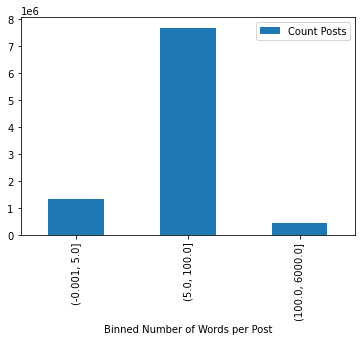

In [11]:
ta_ext.groupby('Binned Number of Words per Post').size().reset_index(name='Count Posts').plot.bar(x='Binned Number of Words per Post', y='Count Posts')

The definition of short and medium posts can be different. When start count medium posts from 17 we have approximately the same number of short and long posts. Message_words take into account even short, stop words. Well, even there is 1 sentence it can be gramatically correct and can be analyzed. I try to exclude very short messages which literally 1-2 words. Long posts are mostly copy&paste of something.

## Per each forum chapter

<AxesSubplot:xlabel='Binned Number of Words per Post,Chapter'>

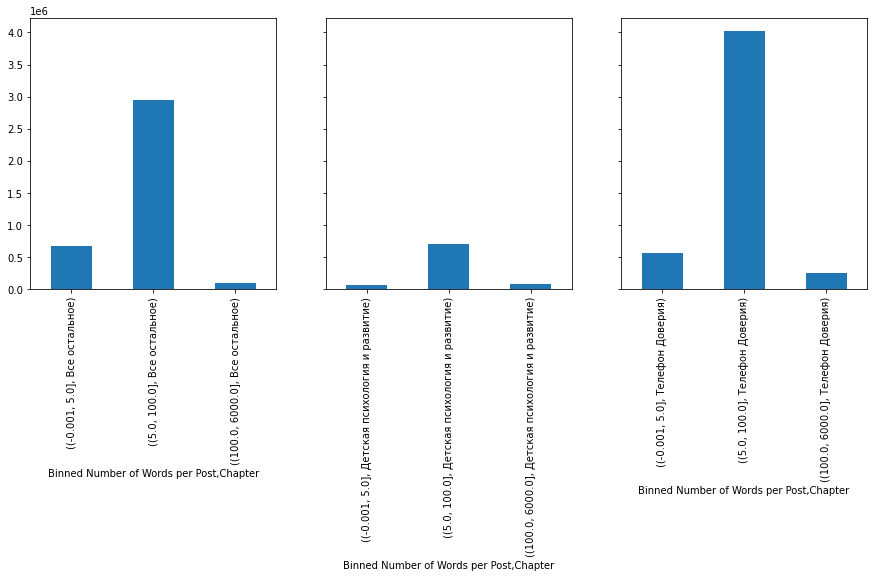

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
ta_ext[ta_ext['Chapter_Id']==77].groupby(['Binned Number of Words per Post','Chapter']).size().plot.bar(ax=axes[0])
ta_ext[ta_ext['Chapter_Id']==137].groupby(['Binned Number of Words per Post','Chapter']).size().plot.bar(ax=axes[1])
ta_ext[ta_ext['Chapter_Id']==63].groupby(['Binned Number of Words per Post','Chapter']).size().plot.bar(ax=axes[2])

Medium and long posts are usual in Детская психология и развитие and Телефон Доверия where a topic is started from a "short" story, a life case, which are triggered long comments with examples of a similar life cases. Все остальное is usually a short discussion or questions.

# Number of posts per forum chapter

In [13]:
ta_ext.groupby('Chapter').size().reset_index(name='Count Posts')

,Chapter,Count Posts
0,Все остальное,3735637
1,Детская психология и развитие,869532
2,Телефон Доверия,4850444


<AxesSubplot:xlabel='Chapter'>

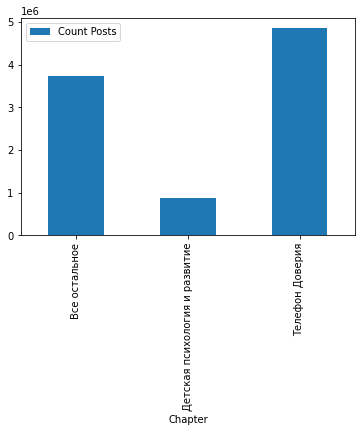

In [14]:
ta_ext.groupby('Chapter').size().reset_index(name='Count Posts').plot.bar(x='Chapter', y='Count Posts')

# Sentiment Analysis

- sentiment_tatyana - based on Tatyana/rubert-base-cased-sentiment-new transformers model https://huggingface.co/Tatyana/rubert-base-cased-sentiment-new
- sentiment_dostoevsky - based on https://github.com/bureaucratic-labs/dostoevsky

## Number of messages per sentiment

<AxesSubplot:xlabel='sentiment'>

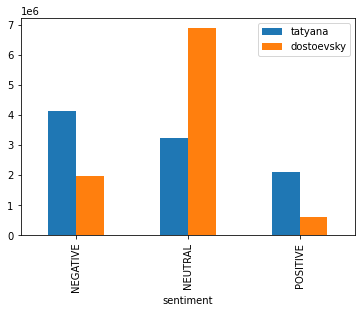

In [15]:
df1=ta_ext.groupby('sentiment_tatyana').size().reset_index(name='Count Posts')
df1.columns=['sentiment','tatyana']
df2=ta_ext.groupby('sentiment_dostoevsky').size().reset_index(name='Count Posts')
df2.columns=['sentiment','dostoevsky']
pd.merge(df1,df2, left_on='sentiment',right_on='sentiment',how='inner').plot.bar(x='sentiment')

sentiment_tatyana: That's very unusual to have more Negative then Neutral. But afterall, eva.ru is the place where women leak their negative emptions

## Number of messages per sentiments and forum chapters.

In [16]:
sentiments = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
mpl_colors = ['red','gray','green']
colors = dict(zip(sentiments, mpl_colors))

<AxesSubplot:xlabel='Chapter'>

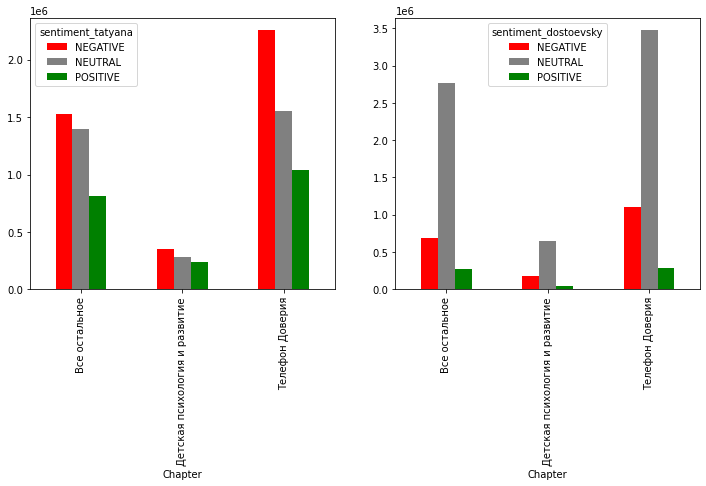

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
ta_ext.groupby(['Chapter','sentiment_tatyana']).size().unstack('sentiment_tatyana').plot.bar(ax=axes[0],color=colors)
ta_ext.groupby(['Chapter','sentiment_dostoevsky']).size().unstack('sentiment_dostoevsky').plot.bar(ax=axes[1],color=colors)

Significantly more negative posts in Телефон Доверия even according to Dostoyevsky approach. Still more negative then positive in Все остальное and Детская психология и развитие according to Tatyana approach.

## Posts length per sentiment.

<AxesSubplot:xlabel='Binned Number of Words per Post'>

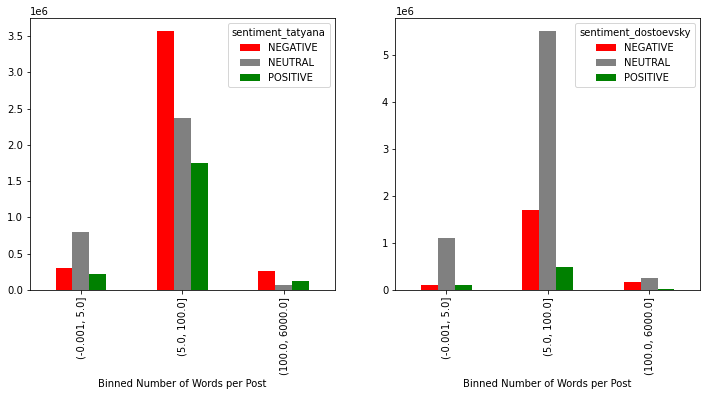

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
ta_ext.groupby(['Binned Number of Words per Post','sentiment_tatyana']).size().unstack('sentiment_tatyana').plot.bar(ax=axes[0],color=colors)
ta_ext.groupby(['Binned Number of Words per Post','sentiment_dostoevsky']).size().unstack('sentiment_dostoevsky').plot.bar(ax=axes[1],color=colors)

Aha, Neutral messages are shorter which just mean it is not possible to define the sentiment.

## Responses per sentiment

### Immediate responses only

<AxesSubplot:xlabel='sentiment'>

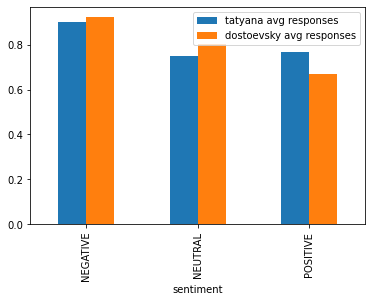

In [19]:
df1=ta_ext[['sentiment_tatyana','cnt_immediate_childs']].groupby('sentiment_tatyana').mean().reset_index()
df1.columns=['sentiment','tatyana avg responses']
df2=ta_ext[['sentiment_dostoevsky','cnt_immediate_childs']].groupby('sentiment_dostoevsky').mean().reset_index()
df2.columns=['sentiment','dostoevsky avg responses']
pd.merge(df1,df2, left_on='sentiment',right_on='sentiment',how='inner').plot.bar(x='sentiment')

### Discussions (replies to replies are included)

<AxesSubplot:xlabel='sentiment'>

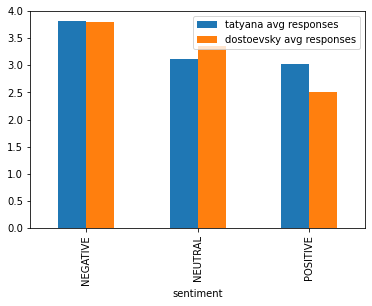

In [20]:
df1=ta_ext[['sentiment_tatyana','cnt_childs']].groupby('sentiment_tatyana').mean().reset_index()
df1.columns=['sentiment','tatyana avg responses']
df2=ta_ext[['sentiment_dostoevsky','cnt_childs']].groupby('sentiment_dostoevsky').mean().reset_index()
df2.columns=['sentiment','dostoevsky avg responses']
pd.merge(df1,df2, left_on='sentiment',right_on='sentiment',how='inner').plot.bar(x='sentiment')

Negative posts have more responses. But close review showed, the more emotional posts have more responses even if they are positive.

## Anonymous and known authors posts per sentiment

In [21]:
ta_ext['isAnonym']=['Anonymous Post' if x==0 else 'Known author' for x in ta_ext['Author_Id']]

<AxesSubplot:xlabel='isAnonym'>

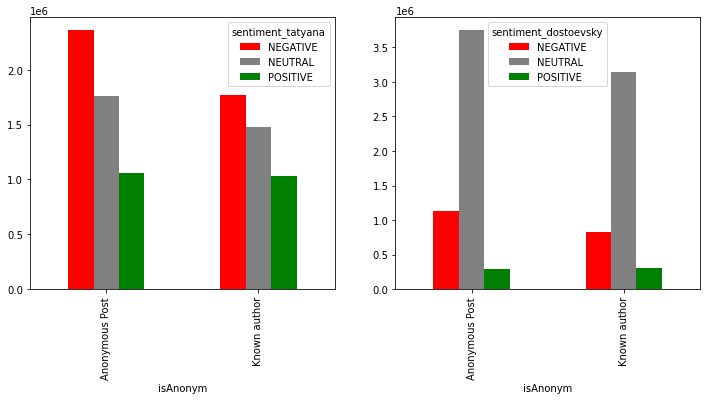

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
ta_ext.groupby(['isAnonym','sentiment_tatyana']).size().unstack('sentiment_tatyana' ).plot(ax=axes[0], kind='bar', color=colors)
ta_ext.groupby(['isAnonym','sentiment_dostoevsky']).size().unstack('sentiment_dostoevsky' ).plot(ax=axes[1], kind='bar', color=colors)

There are more Negative and Neutral (dostoevsky) anonymous posts.  It's a known fact, the users publish negative posts anonymously

# Anonymous and known authors posts per forum chapter

<AxesSubplot:xlabel='Chapter'>

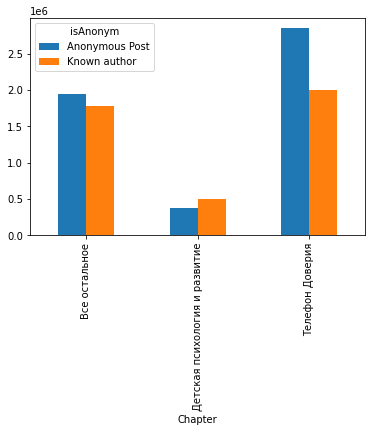

In [23]:
ta_ext.groupby(['Chapter','isAnonym']).size().unstack('isAnonym').plot.bar()

Interesting, there are more NON anonymous posts in Детская психология и развитие. And there is a big difference between anonymous and not anonymous posts in Телефон Доверия where sensitive topics are discussed and, oten, in a negative aspect.  

# Posts aggregating by number of replies (how emotional post is)

In [24]:
ta_ext['cnt_immediate_childs'].max()

164

In [25]:
bins = [0, 1, 5, 200]
ta_ext['Binned Number of Immediate Responses']=pd.cut(ta_ext['cnt_immediate_childs'], bins=bins, include_lowest=True)
ta_ext.groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')

,Binned Number of Immediate Responses,Count Posts
0,"(-0.001, 1.0]",8076077
1,"(1.0, 5.0]",1298267
2,"(5.0, 200.0]",81269


<AxesSubplot:xlabel='Binned Number of Immediate Responses'>

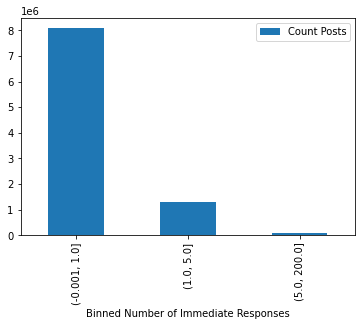

In [26]:
ta_ext.groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts').plot.bar(x='Binned Number of Immediate Responses', y='Count Posts')

## Fraction of responses in Short, Medium and Long posts

<AxesSubplot:xlabel='Binned Number of Immediate Responses'>

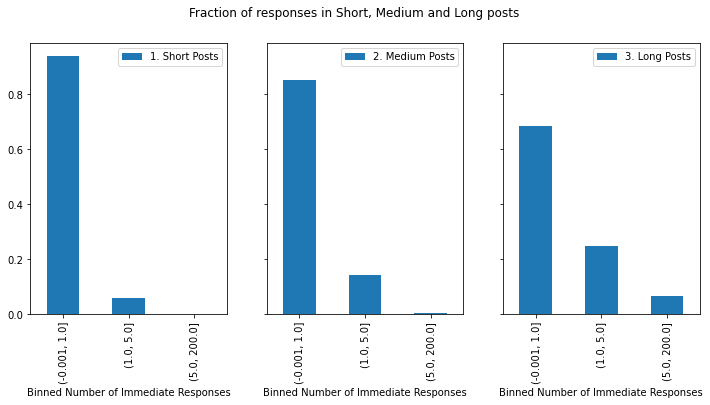

In [27]:
total_num_posts=len(ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=-0.001, right=short_message_limit_words)])
df1=ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=-0.001, right=short_message_limit_words)].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df1.columns=['Binned Number of Immediate Responses','1. Short Posts']
df1['1. Short Posts']=df1['1. Short Posts']/total_num_posts
total_num_posts=len(ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=short_message_limit_words, right=medium_message_limit_words)])
df2=ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=short_message_limit_words, right=medium_message_limit_words)].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df2.columns=['Binned Number of Immediate Responses','2. Medium Posts']
df2['2. Medium Posts']=df2['2. Medium Posts']/total_num_posts
total_num_posts=len(ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=medium_message_limit_words, right=6000)])
df3=ta_ext[ta_ext['Binned Number of Words per Post']==pd.Interval(left=medium_message_limit_words, right=6000)].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df3.columns=['Binned Number of Immediate Responses','3. Long Posts']
df3['3. Long Posts']=df3['3. Long Posts']/total_num_posts

fig, axes = plt.subplots(ncols=3, figsize=(12, 5), sharey=True)
fig.suptitle('Fraction of responses in Short, Medium and Long posts')
df1.plot.bar(x='Binned Number of Immediate Responses',ax=axes[0])
df2.plot.bar(x='Binned Number of Immediate Responses',ax=axes[1])
df3.plot.bar(x='Binned Number of Immediate Responses',ax=axes[2])

Fraction of medium and long posts with more responses are higher then in short posts.

## Responses to different sentiments

<AxesSubplot:xlabel='Binned Number of Immediate Responses'>

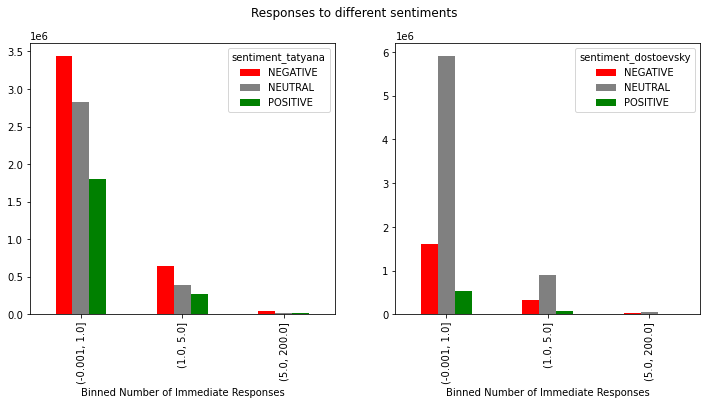

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Responses to different sentiments')
ta_ext.groupby(['Binned Number of Immediate Responses','sentiment_tatyana']).size().unstack('sentiment_tatyana').plot.bar(ax=axes[0],color=colors)
ta_ext.groupby(['Binned Number of Immediate Responses','sentiment_dostoevsky']).size().unstack('sentiment_dostoevsky').plot.bar(ax=axes[1],color=colors)

Negative posts are more emotional and have more responses. Dostoevsky approach consider many such posts neutral

## Responses in different forum chapters

<AxesSubplot:xlabel='Binned Number of Immediate Responses'>

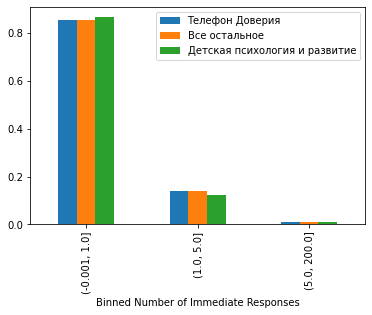

In [29]:
total_num_posts=len(ta_ext[ta_ext['Chapter_Id']==77])
df1=ta_ext[ta_ext['Chapter_Id']==77].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df1.columns=['Binned Number of Immediate Responses','Все остальное']
df1['Все остальное']=df1['Все остальное']/total_num_posts
total_num_posts=len(ta_ext[ta_ext['Chapter_Id']==137])
df2=ta_ext[ta_ext['Chapter_Id']==137].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df2.columns=['Binned Number of Immediate Responses','Детская психология и развитие']
df2['Детская психология и развитие']=df2['Детская психология и развитие']/total_num_posts
total_num_posts=len(ta_ext[ta_ext['Chapter_Id']==63])
df3=ta_ext[ta_ext['Chapter_Id']==63].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df3.columns=['Binned Number of Immediate Responses','Телефон Доверия']
df3['Телефон Доверия']=df3['Телефон Доверия']/total_num_posts
df4=pd.merge(df1,df2, left_on='Binned Number of Immediate Responses',right_on='Binned Number of Immediate Responses',how='inner')
pd.merge(df3,df4, left_on='Binned Number of Immediate Responses',right_on='Binned Number of Immediate Responses',how='inner').plot.bar(x='Binned Number of Immediate Responses')

There is approximately the same rate of posts with different numbers of responses in each forum chapter.

## Responses to anonymoys posts vs posts from known authors

<AxesSubplot:xlabel='Binned Number of Immediate Responses'>

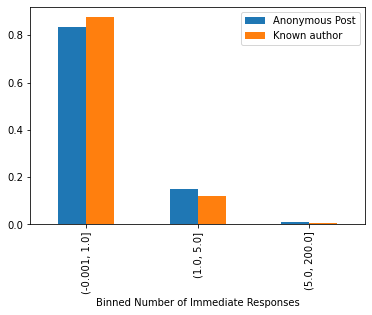

In [30]:
total_num_posts=len(ta_ext[ta_ext['isAnonym']=='Anonymous Post'])
df1=ta_ext[ta_ext['isAnonym']=='Anonymous Post'].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df1.columns=['Binned Number of Immediate Responses','Anonymous Post']
df1['Anonymous Post']=df1['Anonymous Post']/total_num_posts
total_num_posts=len(ta_ext[ta_ext['isAnonym']=='Known author'])
df2=ta_ext[ta_ext['isAnonym']=='Known author'].groupby('Binned Number of Immediate Responses').size().reset_index(name='Count Posts')
df2.columns=['Binned Number of Immediate Responses','Known author']
df2['Known author']=df2['Known author']/total_num_posts
pd.merge(df1,df2, left_on='Binned Number of Immediate Responses',right_on='Binned Number of Immediate Responses',how='inner').plot.bar(x='Binned Number of Immediate Responses')

Anonymous posts are slightly more emotional just because there are more negative posts.

# Advanced text attributes analysis

The analyzed text is social media posts, which are done in a hurry without a lot of attention. There are usually the same mean and very high std and skew in all categories due to typos or intentinal misspelling and emotions. The short posts sometimes are not a text at all. Just words. Only analysis by author reveals some distinctions in authors styles. Some use more exclamations, the others skip periods and get more longer sentenses, there are authors who likes emojis or demo their photos.Some authors do not use clear russian texts for whatever reason (do not have russian keyboard as an example and type using latin alphabet) and may have less recognized adjectives and nouns but it is not very visible. It may look like outliers but, in fact, in many cases, this is a sign an author likes to use emojis, links or exclamations more then other authors.

## Average word length (ASW = num_syllables/num_words) and percent of long words (PLW = num_long_words/num_words, long_word_syllabels is >= 3)

In [31]:
ta_ext[['ASW','PLW','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                 \
                                   median      mean       std       skew   
Binned Number of Words per Post                                            
(-0.001, 5.0]                    2.000000  1.878288  1.219681  28.872707   
(5.0, 100.0]                     1.857143  1.880456  0.328400   0.834820   
(100.0, 6000.0]                  1.873874  1.887534  0.195589   5.029870   

                                      PLW                                
                                   median      mean       std      skew  
Binned Number of Words per Post                                          
(-0.001, 5.0]                    0.000000  0.108206  0.211758  2.518235  
(5.0, 100.0]                     0.086957  0.094907  0.076926  1.124594  
(100.0, 6000.0]                  0.092025  0.097078  0.040282  2.102777

Let's analyze by other categories only medium posts to exclude separate words (short posts) or copy&paste from other sources (long messages)

array([<AxesSubplot:title={'center':'ASW'}>], dtype=object)

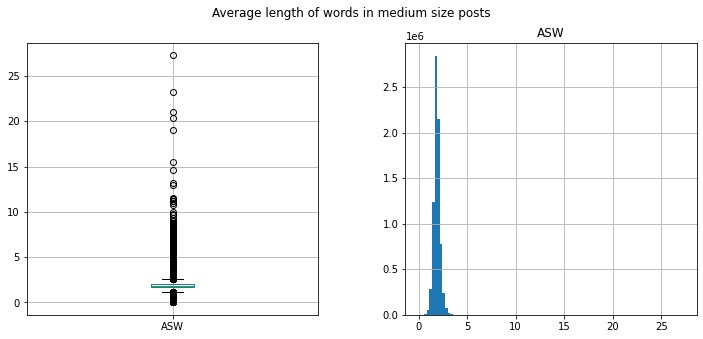

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Average length of words in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'PLW'}>], dtype=object)

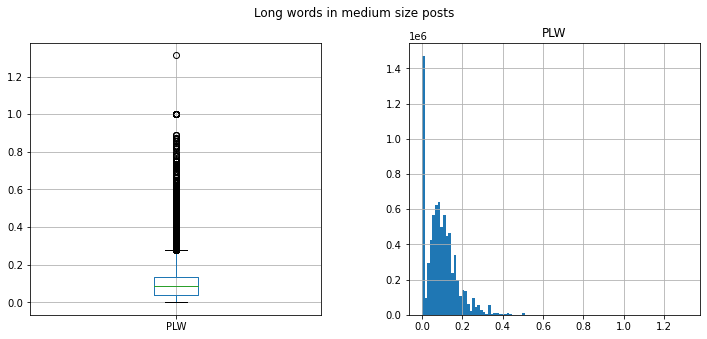

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Long words in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['PLW']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['PLW']].hist(ax=axes[1], bins=100)

In [34]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW','PLW','Chapter']].groupby('Chapter').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                \
                                 median      mean       std      skew   
Chapter                                                                 
Все остальное                  1.875000  1.898997  0.351632  1.034627   
Детская психология и развитие  1.880000  1.897518  0.316818  0.526212   
Телефон Доверия                1.846154  1.863873  0.311482  0.642908   

                                    PLW                                
                                 median      mean       std      skew  
Chapter                                                                
Все остальное                  0.090909  0.099501  0.082251  1.087701  
Детская психология и развитие  0.090909  0.099504  0.072593  1.066600  
Телефон Доверия                0.083333  0.090732  0.073313  1.137358

In [35]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW','PLW','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                     PLW            \
                     median      mean       std      skew    median      mean   
sentiment_tatyana                                                               
NEGATIVE           1.857143  1.874831  0.308926  0.766879  0.083333  0.092231   
NEUTRAL            1.866667  1.885894  0.362403  0.579779  0.090909  0.098349   
POSITIVE           1.862745  1.884562  0.318071  1.416864  0.088235  0.095697   

                                       
                        std      skew  
sentiment_tatyana                      
NEGATIVE           0.072538  1.088086  
NEUTRAL            0.086125  1.099953  
POSITIVE           0.072031  1.124165

In [36]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW','PLW','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                     PLW  \
                        median      mean       std      skew    median   
sentiment_dostoevsky                                                     
NEGATIVE              1.857143  1.880075  0.287128  0.757204  0.083333   
NEUTRAL               1.857143  1.877901  0.338356  0.766224  0.090909   
POSITIVE              1.880000  1.911011  0.346923  1.641668  0.084507   

                                                    
                          mean       std      skew  
sentiment_dostoevsky                                
NEGATIVE              0.089177  0.067802  1.161413  
NEUTRAL               0.096715  0.079176  1.086801  
POSITIVE              0.094398  0.079982  1.221732

In [37]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW','PLW','isAnonym']].groupby('isAnonym').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                     PLW            \
                  median      mean       std      skew    median      mean   
isAnonym                                                                     
Anonymous Post  1.853659  1.872202  0.320734  0.783651  0.083333  0.091780   
Known author    1.873016  1.890404  0.337139  0.879863  0.090909  0.098675   

                                    
                     std      skew  
isAnonym                            
Anonymous Post  0.075678  1.147585  
Known author    0.078238  1.096251

In [38]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['ASW','PLW','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                \
                                        median      mean       std      skew   
Binned Number of Immediate Responses                                           
(-0.001, 1.0]                         1.857143  1.877458  0.330792  0.831711   
(1.0, 5.0]                            1.875000  1.895747  0.314767  0.876739   
(5.0, 200.0]                          1.909091  1.934123  0.294551  0.872371   

                                           PLW                                
                                        median      mean       std      skew  
Binned Number of Immediate Responses                                          
(-0.001, 1.0]                         0.086957  0.094611  0.077579  1.125432  
(1.0, 5.0]                            0.088235  0.096394  0.073420  1.123881  
(5.0, 200.0]                          0.093023  0.100712  0.065560  1.132163

There is nothing interesting in the spread of long words and average length of words between different categories. Just some categories are so not smooth it does not make sense to analyze.

More then 20,000 authors posted their messages. Sometimes there are only few posts with an author name and then the author starts posting anonymously. Let's take a look at the authors posts if they have more then 100 medium sized posts to get enough text to see if there is something distinct in the style.

The purpose of the next 2 cells is to review if there is something distinct in the authors style and understand if it worse to add features to detail authorship attribution analysis which will be done in a separate notebook.

In [39]:
df=ta_ext[((ta_ext['Author_Id']>0) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=100))][['Message_Id','Author_Id']].groupby(['Author_Id']).size().reset_index(name='cnt_medium_posts')
Authors=df[df['cnt_medium_posts']>=100]['Author_Id'].tolist()
num_authors=len(Authors)
print('Number of authors with more then 100 medium posts is %s'%num_authors)

Number of authors with more then 100 medium posts is 2484


In [40]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([16035,90820,116852,191294,124655])))][['ASW','PLW','Author_Id']].groupby('Author_Id').agg({'ASW':['median','mean','std','skew'],'PLW':['median','mean','std','skew']})

ASW                                     PLW            \
             median      mean       std      skew    median      mean   
Author_Id                                                               
16035      2.000000  2.051703  0.380229  0.756850  0.121622  0.129373   
90820      1.904509  1.921853  0.300940  0.643600  0.100000  0.108010   
116852     1.882353  1.898702  0.355851  0.538807  0.100000  0.108964   
124655     1.758621  1.772382  0.276622  0.179768  0.055556  0.064397   
191294     1.893617  1.912248  0.310561  0.472992  0.088889  0.096169   

                               
                std      skew  
Author_Id                      
16035      0.090541  0.917659  
90820      0.073983  1.009390  
116852     0.087248  0.954704  
124655     0.063847  1.366741  
191294     0.080489  1.074363

Some of authors (124655) use shorter words because their language is very simplified.

In [41]:
#This function calculate z-score mean of a text attribute column for each author to mean of the text attribute of all known authors posts in the dataset
#and returns how many authors have significantly higher (>2) mean of teh text attribute
#only medium size posts are taken into account
def diff_in_authors_style(ta_column_name, threshold):
    mu=ta_ext[((ta_ext['Author_Id'].isin(Authors)) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][ta_column_name].mean()
    std=ta_ext[((ta_ext['Author_Id'].isin(Authors)) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][ta_column_name].std(ddof=0)
    print('%s mean of all analyzed authors is %s'%(ta_column_name,mu))
    print('%s std of all analyzed authors is %s'%(ta_column_name,std))
    #mu=ta_ext[((ta_ext['isAnonym']=='Known author') & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][ta_column_name].mean()
    #std=ta_ext[((ta_ext['isAnonym']=='Known author') & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][ta_column_name].std(ddof=0)
    df=ta_ext[((ta_ext['Author_Id'].isin(Authors)) & (ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][[ta_column_name,'Author_Id']].groupby('Author_Id').mean().reset_index()
    df.columns=['Author_Id','mean']
    df['zscore'] = (df['mean'] - mu)/std
    num_diff=len(df[df['zscore'].abs()>=threshold])
    p = 100.000*num_diff/num_authors
    print('Threahold for z-score to find outliers is %s'%threshold)
    print('Percent of authors with significant different average of %s is %s'%(ta_column_name,p))

In [42]:
diff_in_authors_style('ASW',2)
diff_in_authors_style('PLW',2)

ASW mean of all analyzed authors is 1.8897691957361864
ASW std of all analyzed authors is 0.3369018997500499
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of ASW is 0.1610305958132045
PLW mean of all analyzed authors is 0.09869778899601894
PLW std of all analyzed authors is 0.07834324737830978
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of PLW is 0.0


## Type Token Ratio (TTR,TTR_A,TTR_N,TTR_V)

 - TTR - type token ratio is a fraction of unique tokens (num_tokens=num_Adj + num_Nouns + num_Verb) in a message  to all recognized adjective, nouns and verbs(num_tokens=num_Adj + num_Nouns + num_Verb): num_unique_tokens/num_tokens
 - TTR_A - fraction of unique recognized adjectives in a message to all recognized adjective: TTR_A = num_unique_Adj/num_Adj
 - TTR_N - fraction of unique recognized nouns in a message to all recognized nouns: num_unique_Nouns/num_Nouns
 - TTR_V -  fraction of unique recognized verbs in a message to all recognized verbs: num_unique_Verb/num_Verb

In [43]:
ta_ext[['TTR','TTR_A','TTR_N','TTR_V','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                \
                                   median      mean       std      skew   
Binned Number of Words per Post                                           
(-0.001, 5.0]                    0.333333  0.409902  0.282305 -0.003743   
(5.0, 100.0]                     0.909091  0.885366  0.129642 -1.890025   
(100.0, 6000.0]                  0.844828  0.837933  0.074063 -0.958252   

                                 TTR_A                                \
                                median      mean       std      skew   
Binned Number of Words per Post                                        
(-0.001, 5.0]                      0.0  0.198583  0.398725  1.511100   
(5.0, 100.0]                       1.0  0.686440  0.453707 -0.822946   
(100.0, 6000.0]                    1.0  0.928520  0.107606 -2.555618   

                                    TTR_N                                \
                                   median      mean       std      skew   
Binned Number of Words per Post                                           
(-0.001, 5.0]                    1.000000  0.528741  0.498622 -0.115343   
(5.0, 100.0]                     1.000000  0.922943  0.188571 -3.812202   
(100.0, 6000.0]                  0.826087  0.817531  0.099439 -0.669630   

                                 TTR_V                                
                                median      mean       std      skew  
Binned Number of Words per Post                                       
(-0.001, 5.0]                     0.00  0.415900  0.492434  0.341171  
(5.0, 100.0]                      1.00  0.903875  0.238616 -3.088814  
(100.0, 6000.0]                   0.85  0.843926  0.095890 -0.702777

array([<AxesSubplot:title={'center':'TTR'}>], dtype=object)

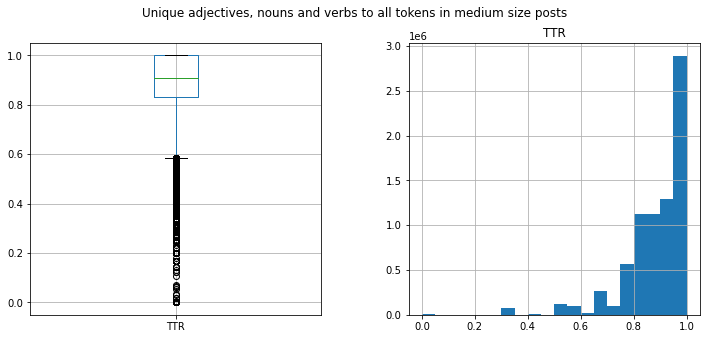

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Unique adjectives, nouns and verbs to all tokens in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR']].hist(ax=axes[1], bins=20)

array([<AxesSubplot:title={'center':'TTR_A'}>], dtype=object)

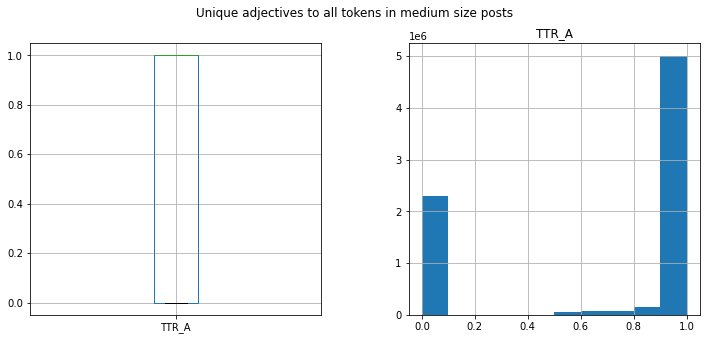

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Unique adjectives to all tokens in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_A']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_A']].hist(ax=axes[1], bins=10)

array([<AxesSubplot:title={'center':'TTR_N'}>], dtype=object)

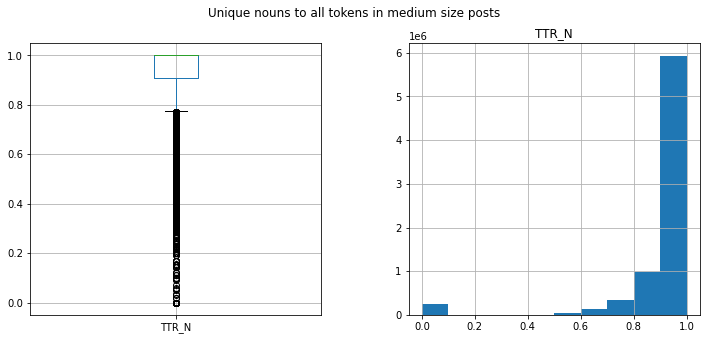

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Unique nouns to all tokens in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_N']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_N']].hist(ax=axes[1], bins=10)

array([<AxesSubplot:title={'center':'TTR_V'}>], dtype=object)

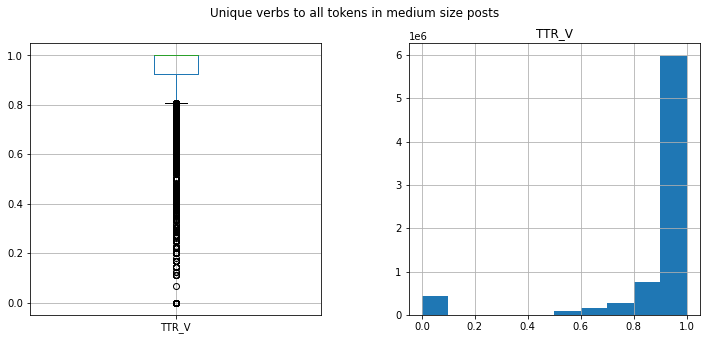

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Unique verbs to all tokens in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_V']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR_V']].hist(ax=axes[1], bins=10)

In [48]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR','TTR_A','TTR_N','TTR_V','Chapter']].groupby('Chapter').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                TTR_A  \
                                 median      mean       std      skew median   
Chapter                                                                        
Все остальное                  0.909091  0.881251  0.137076 -1.849188    1.0   
Детская психология и развитие  0.913043  0.893593  0.114036 -1.972890    1.0   
Телефон Доверия                0.909091  0.886926  0.126490 -1.886769    1.0   

                                                             TTR_N            \
                                   mean       std      skew median      mean   
Chapter                                                                        
Все остальное                  0.669063  0.461530 -0.735094    1.0  0.926066   
Детская психология и развитие  0.737154  0.426320 -1.108557    1.0  0.919908   
Телефон Доверия                0.690216  0.451852 -0.842315    1.0  0.921191   

                                                   TTR_V                      \
                                    std      skew median      mean       std   
Chapter                                                                        
Все остальное                  0.195043 -3.831172    1.0  0.894015  0.263194   
Детская психология и развитие  0.164379 -3.867147    1.0  0.911246  0.204543   
Телефон Доверия                0.187712 -3.776329    1.0  0.909792  0.224624   

                                         
                                   skew  
Chapter                                  
Все остальное                 -2.801407  
Детская психология и развитие -3.442755  
Телефон Доверия               -3.269959

In [49]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR','TTR_A','TTR_N','TTR_V','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                TTR_A            \
                     median      mean       std      skew median      mean   
sentiment_tatyana                                                            
NEGATIVE           0.916667  0.894801  0.119548 -1.932917    1.0  0.698594   
NEUTRAL            0.888889  0.862113  0.149414 -1.658547    1.0  0.621347   
POSITIVE           0.920000  0.897680  0.115682 -1.973612    1.0  0.750048   

                                       TTR_N                                \
                        std      skew median      mean       std      skew   
sentiment_tatyana                                                            
NEGATIVE           0.448781 -0.883770    1.0  0.926520  0.175893 -3.950960   
NEUTRAL            0.476460 -0.515372    1.0  0.916595  0.216804 -3.474999   
POSITIVE           0.419610 -1.186108    1.0  0.924258  0.171370 -3.985213   

                   TTR_V                                
                  median      mean       std      skew  
sentiment_tatyana                                       
NEGATIVE             1.0  0.917269  0.212324 -3.463630  
NEUTRAL              1.0  0.880835  0.284616 -2.547572  
POSITIVE             1.0  0.907810  0.217615 -3.282188

In [50]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR','TTR_A','TTR_N','TTR_V','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                TTR_A            \
                        median      mean       std      skew median      mean   
sentiment_dostoevsky                                                            
NEGATIVE              0.923077  0.900016  0.114690 -2.049044    1.0  0.740564   
NEUTRAL               0.904762  0.880718  0.133083 -1.838011    1.0  0.665034   
POSITIVE              0.916667  0.886945  0.135375 -1.851584    1.0  0.740708   

                                          TTR_N                                \
                           std      skew median      mean       std      skew   
sentiment_dostoevsky                                                            
NEGATIVE              0.426438 -1.123631    1.0  0.923760  0.175217 -3.951706   
NEUTRAL               0.462361 -0.716539    1.0  0.922981  0.190752 -3.789000   
POSITIVE              0.425655 -1.124870    1.0  0.919633  0.207808 -3.585744   

                      TTR_V                                
                     median      mean       std      skew  
sentiment_dostoevsky                                       
NEGATIVE                1.0  0.919325  0.196704 -3.635346  
NEUTRAL                 1.0  0.901430  0.245963 -3.005648  
POSITIVE                1.0  0.877445  0.280778 -2.516912

In [51]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR','TTR_A','TTR_N','TTR_V','isAnonym']].groupby('isAnonym').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                TTR_A            \
                  median      mean       std      skew median      mean   
isAnonym                                                                  
Anonymous Post  0.909091  0.883512  0.129517 -1.845633    1.0  0.678805   
Known author    0.913043  0.887600  0.129759 -1.944950    1.0  0.695642   

                                    TTR_N                                \
                     std      skew median      mean       std      skew   
isAnonym                                                                  
Anonymous Post  0.456771 -0.784389    1.0  0.921883  0.189643 -3.774424   
Known author    0.449814 -0.870483    1.0  0.924220  0.187263 -3.858948   

                TTR_V                                
               median      mean       std      skew  
isAnonym                                             
Anonymous Post    1.0  0.903847  0.237676 -3.095595  
Known author      1.0  0.903908  0.239744 -3.080673

In [52]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['TTR','TTR_A','TTR_N','TTR_V','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']}) 

TTR                                \
                                        median      mean       std      skew   
Binned Number of Immediate Responses                                           
(-0.001, 1.0]                         0.909091  0.883060  0.132551 -1.870878   
(1.0, 5.0]                            0.916667  0.898235  0.111766 -1.882016   
(5.0, 200.0]                          0.913043  0.901317  0.090192 -1.618710   

                                      TTR_A                                \
                                     median      mean       std      skew   
Binned Number of Immediate Responses                                        
(-0.001, 1.0]                           1.0  0.677565  0.457712 -0.777491   
(1.0, 5.0]                              1.0  0.732842  0.429284 -1.080947   
(5.0, 200.0]                            1.0  0.819567  0.360930 -1.738376   

                                         TTR_N                                \
                                        median      mean       std      skew   
Binned Number of Immediate Responses                                           
(-0.001, 1.0]                         1.000000  0.922160  0.193909 -3.756161   
(1.0, 5.0]                            1.000000  0.928094  0.156126 -4.076083   
(5.0, 200.0]                          0.944444  0.910593  0.125407 -3.075152   

                                      TTR_V                                
                                     median      mean       std      skew  
Binned Number of Immediate Responses                                       
(-0.001, 1.0]                           1.0  0.902241  0.243281 -3.034502  
(1.0, 5.0]                              1.0  0.912968  0.212074 -3.409608  
(5.0, 200.0]                            1.0  0.915730  0.159898 -3.761151

In [53]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([16035,90820,116852,191294,124655])))][['TTR','TTR_A','TTR_N','TTR_V','Author_Id']].groupby('Author_Id').agg({'TTR':['median','mean','std','skew'],'TTR_A':['median','mean','std','skew'],'TTR_N':['median','mean','std','skew'],'TTR_V':['median','mean','std','skew']})

TTR                                TTR_A                      \
             median      mean       std      skew median      mean       std   
Author_Id                                                                      
16035      0.933333  0.903027  0.121176 -2.000744    1.0  0.763437  0.414851   
90820      0.944444  0.916284  0.109738 -2.419946    1.0  0.776131  0.406677   
116852     0.950000  0.893184  0.147054 -2.010251    1.0  0.686159  0.459769   
124655     0.875000  0.852095  0.149296 -1.695622    1.0  0.589356  0.481718   
191294     0.882353  0.864701  0.137441 -1.534764    1.0  0.614981  0.477101   

                     TTR_N                                TTR_V            \
               skew median      mean       std      skew median      mean   
Author_Id                                                                   
16035     -1.265982    1.0  0.943620  0.154995 -4.691850    1.0  0.875782   
90820     -1.352152    1.0  0.944702  0.144878 -4.972132    1.0  0.920563   
116852    -0.809516    1.0  0.943908  0.200078 -4.208175    1.0  0.888510   
124655    -0.376187    1.0  0.899963  0.234307 -3.072403    1.0  0.883578   
191294    -0.487077    1.0  0.911004  0.203838 -3.380324    1.0  0.903041   

                               
                std      skew  
Author_Id                      
16035      0.283261 -2.467521  
90820      0.216957 -3.543161  
116852     0.292217 -2.581512  
124655     0.257389 -2.712431  
191294     0.244830 -3.011004

In [54]:
diff_in_authors_style('TTR',2)
diff_in_authors_style('TTR_A',2)
diff_in_authors_style('TTR_N',2)
diff_in_authors_style('TTR_V',2)

TTR mean of all analyzed authors is 0.8874915547687107
TTR std of all analyzed authors is 0.13012539859853464
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of TTR is 0.0
TTR_A mean of all analyzed authors is 0.6948270587204777
TTR_A std of all analyzed authors is 0.4502021518741997
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of TTR_A is 0.0
TTR_N mean of all analyzed authors is 0.9244281616773748
TTR_N std of all analyzed authors is 0.18769955732209495
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of TTR_N is 0.0
TTR_V mean of all analyzed authors is 0.9036834796991616
TTR_V std of all analyzed authors is 0.24066578948342893
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of TTR_V is 0.0


No outliers, no significant difference between the authors too.

## Recognized adjective and knowns to verbs (NAV = (TTR_A +TTR_N)/TTR_V) and unique recognized adjective and knowns to verbs (UNAV = (num_unique_Adj +num_unique_Nouns)/num_unique_Verb)

In [55]:
ta_ext[['NAV','UNAV','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                \
                                   median      mean       std      skew   
Binned Number of Words per Post                                           
(-0.001, 5.0]                    0.000000  0.282746  0.528455  1.721587   
(5.0, 100.0]                     1.952663  1.616167  0.698121 -0.515771   
(100.0, 6000.0]                  2.067647  2.091244  0.288969  0.947942   

                                   UNAV                                 
                                 median      mean       std       skew  
Binned Number of Words per Post                                         
(-0.001, 5.0]                    0.0000  0.323049  0.655441   2.232441  
(5.0, 100.0]                     1.6000  1.981303  1.711264   2.846480  
(100.0, 6000.0]                  1.6875  1.887970  1.209812  28.279772

array([<AxesSubplot:title={'center':'NAV'}>], dtype=object)

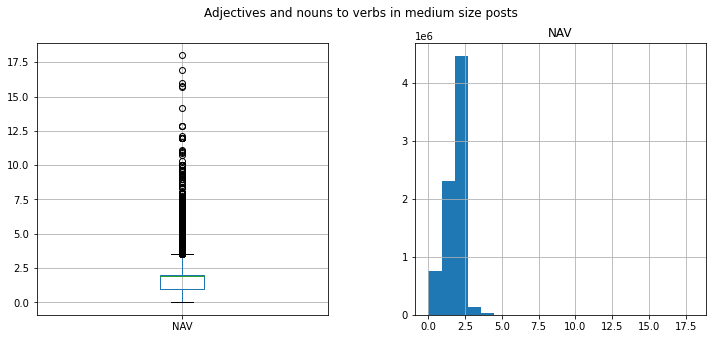

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Adjectives and nouns to verbs in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV']].hist(ax=axes[1], bins=20)

array([<AxesSubplot:title={'center':'UNAV'}>], dtype=object)

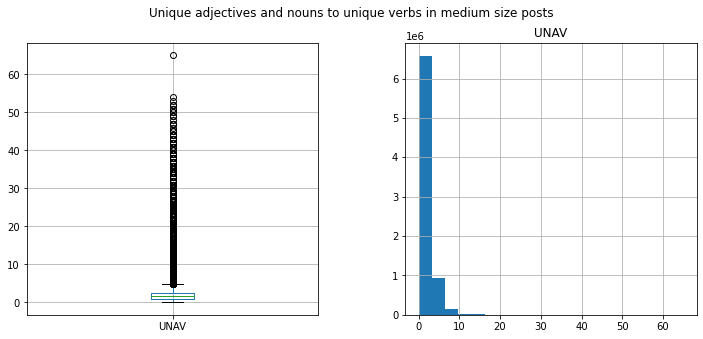

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Unique adjectives and nouns to unique verbs in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['UNAV']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['UNAV']].hist(ax=axes[1], bins=20)

In [58]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV','UNAV','Chapter']].groupby('Chapter').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                \
                                 median      mean       std      skew   
Chapter                                                                 
Все остальное                  1.925926  1.567890  0.726115 -0.428552   
Детская психология и развитие  2.000000  1.715775  0.646187 -0.656764   
Телефон Доверия                1.974359  1.633939  0.683175 -0.547697   

                                   UNAV                                
                                 median      mean       std      skew  
Chapter                                                                
Все остальное                  1.666667  2.091855  1.860246  2.808700  
Детская психология и развитие  1.583333  1.951038  1.612252  3.113068  
Телефон Доверия                1.500000  1.905707  1.606896  2.764927

In [59]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV','UNAV','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                    UNAV            \
                     median      mean       std      skew    median      mean   
sentiment_tatyana                                                               
NEGATIVE           2.000000  1.654574  0.662930 -0.534976  1.555556  1.952489   
NEUTRAL            1.846154  1.483986  0.751513 -0.357277  1.571429  1.962702   
POSITIVE           2.000000  1.717283  0.665659 -0.608909  1.666667  2.065445   

                                       
                        std      skew  
sentiment_tatyana                      
NEGATIVE           1.645542  2.811898  
NEUTRAL            1.784015  2.710607  
POSITIVE           1.739095  3.086707

In [60]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV','UNAV','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                    UNAV  \
                        median      mean       std      skew    median   
sentiment_dostoevsky                                                     
NEGATIVE              2.000000  1.717332  0.641225 -0.672308  1.500000   
NEUTRAL               1.916667  1.584617  0.706854 -0.467444  1.615385   
POSITIVE              2.000000  1.620849  0.753572 -0.462481  1.727273   

                                                    
                          mean       std      skew  
sentiment_dostoevsky                                
NEGATIVE              1.872604  1.524143  2.922092  
NEUTRAL               2.001463  1.746126  2.841198  
POSITIVE              2.133382  1.900483  2.493686

In [61]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV','UNAV','isAnonym']].groupby('isAnonym').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                    UNAV            \
                median      mean       std      skew    median      mean   
isAnonym                                                                   
Anonymous Post  1.9375  1.609488  0.698675 -0.495054  1.545455  1.944953   
Known author    2.0000  1.624216  0.697368 -0.540935  1.666667  2.025109   

                                    
                     std      skew  
isAnonym                            
Anonymous Post  1.678160  2.848258  
Known author    1.749325  2.839603

In [62]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['NAV','UNAV','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                \
                                        median      mean       std      skew   
Binned Number of Immediate Responses                                           
(-0.001, 1.0]                         1.941176  1.600053  0.705774 -0.492929   
(1.0, 5.0]                            2.000000  1.700789  0.649305 -0.605872   
(5.0, 200.0]                          2.000000  1.849155  0.541188 -0.815277   

                                          UNAV                                
                                        median      mean       std      skew  
Binned Number of Immediate Responses                                          
(-0.001, 1.0]                         1.571429  1.962334  1.706139  2.793332  
(1.0, 5.0]                            1.666667  2.088926  1.741343  3.113603  
(5.0, 200.0]                          1.700000  2.073285  1.609766  3.930752

In [63]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([69715,16035,90820,116852,191294,124655])))][['NAV','UNAV','Author_Id']].groupby('Author_Id').agg({'NAV':['median','mean','std','skew'],'UNAV':['median','mean','std','skew']})

NAV                                    UNAV            \
             median      mean       std      skew    median      mean   
Author_Id                                                               
16035      2.000000  1.677184  0.758903 -0.342785  2.166667  2.769243   
69715      2.000000  1.694372  0.686194 -0.015467  1.666667  1.987246   
90820      2.000000  1.727439  0.629617 -0.906890  2.000000  2.282628   
116852     2.000000  1.531064  0.738862 -0.582220  1.666667  2.094244   
124655     1.800000  1.503426  0.746945 -0.280165  1.333333  1.639569   
191294     1.833333  1.521579  0.712316 -0.291891  1.500000  1.820244   

                               
                std      skew  
Author_Id                      
16035      2.435305  2.414320  
69715      1.596810  2.749711  
90820      1.843524  2.620113  
116852     1.920223  2.435235  
124655     1.475547  2.388059  
191294     1.570151  2.333933

In [64]:
diff_in_authors_style('NAV',2)
diff_in_authors_style('UNAV',2)

NAV mean of all analyzed authors is 1.6222654703704127
NAV std of all analyzed authors is 0.6986995317386805
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of NAV is 0.0
UNAV mean of all analyzed authors is 2.0314707870456545
UNAV std of all analyzed authors is 1.7543707612195079
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of UNAV is 0.0


No outliers, kind the same mean, high std and skew (UNAV). Well, but 124655 is stay somewheer apart from the others, close still

## Number of emojis, images and links

In [65]:
ta_ext[['emojis', 'images', 'links','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                 images  \
                                median      mean       std        skew median   
Binned Number of Words per Post                                                 
(-0.001, 5.0]                        0  0.204967  0.929567  188.787074      0   
(5.0, 100.0]                         0  0.228907  0.819083  474.438009      0   
(100.0, 6000.0]                      0  0.447320  1.147467    5.508819      0   

                                                                 links  \
                                     mean       std        skew median   
Binned Number of Words per Post                                          
(-0.001, 5.0]                    0.012924  0.182091  245.204373      0   
(5.0, 100.0]                     0.003764  0.089602   89.639937      0   
(100.0, 6000.0]                  0.005209  0.219180  208.381358      0   

                                                                 
                                     mean       std        skew  
Binned Number of Words per Post                                  
(-0.001, 5.0]                    0.034639  0.227311   23.064809  
(5.0, 100.0]                     0.013372  0.161741   36.178447  
(100.0, 6000.0]                  0.039676  0.726468  199.042744

For whatever reason, theer are more emojies in long posts

array([<AxesSubplot:title={'center':'emojis'}>], dtype=object)

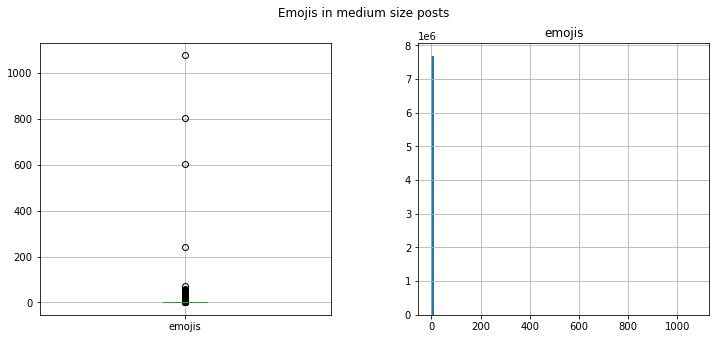

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Emojis in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'emojis'}>], dtype=object)

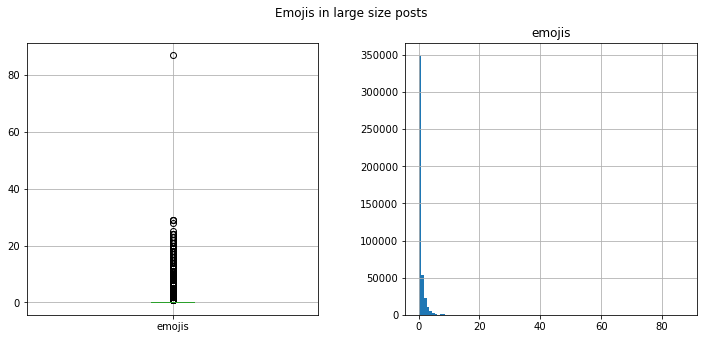

In [67]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Emojis in large size posts')
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['emojis']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['emojis']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'images'}>], dtype=object)

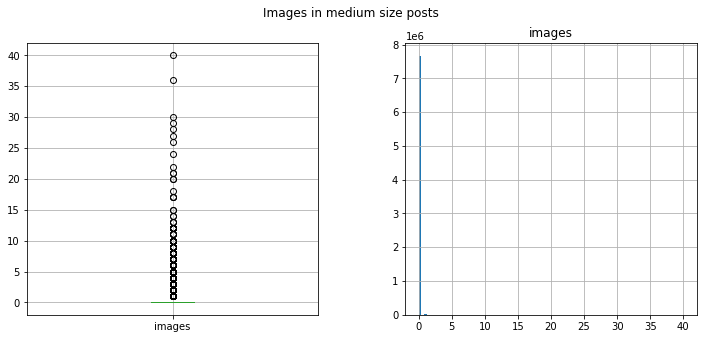

In [68]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Images in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['images']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['images']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'links'}>], dtype=object)

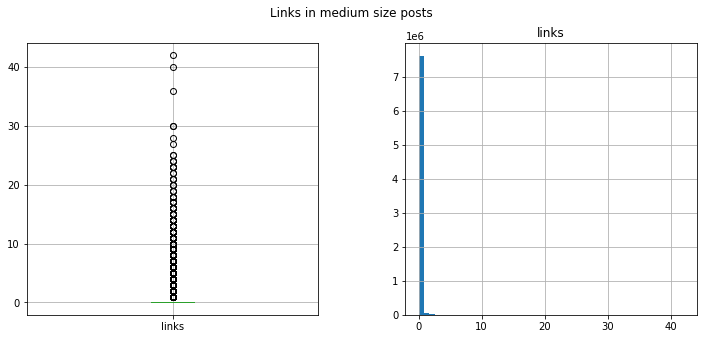

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Links in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['links']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['links']].hist(ax=axes[1], bins=50)

In [70]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis', 'images', 'links','Chapter']].groupby('Chapter').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                 images  \
                              median      mean       std        skew median   
Chapter                                                                       
Все остальное                      0  0.256991  1.088862  525.020909      0   
Детская психология и развитие      0  0.248281  0.632112    3.966792      0   
Телефон Доверия                    0  0.204929  0.583709    5.708222      0   

                                                              links            \
                                   mean       std       skew median      mean   
Chapter                                                                         
Все остальное                  0.007981  0.134218  65.801728      0  0.023855   
Детская психология и развитие  0.001189  0.045077  76.137680      0  0.014871   
Телефон Доверия                0.001132  0.041888  70.921781      0  0.005433   

                                                    
                                    std       skew  
Chapter                                             
Все остальное                  0.217736  28.988262  
Детская психология и развитие  0.189274  33.883972  
Телефон Доверия                0.093569  38.617815

In [71]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis', 'images', 'links','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                 images            \
                  median      mean       std        skew median      mean   
sentiment_tatyana                                                           
NEGATIVE               0  0.209296  0.930282  614.643847      0  0.002746   
NEUTRAL                0  0.213968  0.572691    5.168802      0  0.004637   
POSITIVE               0  0.289271  0.857103  214.791483      0  0.004660   

                                         links                                 
                        std        skew median      mean       std       skew  
sentiment_tatyana                                                              
NEGATIVE           0.077886  123.161519      0  0.010788  0.141498  41.623997  
NEUTRAL            0.101207   79.480826      0  0.018448  0.192284  32.205783  
POSITIVE           0.095003   61.800892      0  0.011756  0.154786  32.753130

In [72]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis', 'images', 'links','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                 images            \
                     median      mean       std        skew median      mean   
sentiment_dostoevsky                                                           
NEGATIVE                  0  0.243016  0.651067    5.246691      0  0.002085   
NEUTRAL                   0  0.215473  0.867948  555.325026      0  0.003926   
POSITIVE                  0  0.332853  0.764281    5.871194      0  0.007833   

                                           links                      \
                           std       skew median      mean       std   
sentiment_dostoevsky                                                   
NEGATIVE              0.062280  93.981410      0  0.005833  0.096948   
NEUTRAL               0.090675  86.071532      0  0.015592  0.174832   
POSITIVE              0.142816  73.787131      0  0.014519  0.185782   

                                 
                           skew  
sentiment_dostoevsky             
NEGATIVE              39.530840  
NEUTRAL               33.552197  
POSITIVE              41.095170

More positive emojies?

In [73]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis', 'images', 'links','isAnonym']].groupby('isAnonym').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                 images            \
               median      mean       std        skew median      mean   
isAnonym                                                                 
Anonymous Post      0  0.152430  0.819759  762.375485      0  0.002607   
Known author        0  0.321071  0.808714  130.045791      0  0.005159   

                                     links                                 
                     std       skew median      mean       std       skew  
isAnonym                                                                   
Anonymous Post  0.077504  89.808421      0  0.011246  0.142421  33.335327  
Known author    0.102281  85.786149      0  0.015934  0.182290  36.549871

Hmm, non anonymous posts have more emojis and images (images is understanable, because personal photos from "passport" maybe shared)

In [74]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['emojis', 'images', 'links','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                  \
                                     median      mean       std        skew   
Binned Number of Immediate Responses                                          
(-0.001, 1.0]                             0  0.232476  0.738433  288.057104   
(1.0, 5.0]                                0  0.210558  1.193741  660.820079   
(5.0, 200.0]                              0  0.168267  0.569106    6.432872   

                                     images                                  \
                                     median      mean       std        skew   
Binned Number of Immediate Responses                                          
(-0.001, 1.0]                             0  0.002940  0.075893  103.222619   
(1.0, 5.0]                                0  0.007810  0.137159   59.305911   
(5.0, 200.0]                              0  0.022098  0.256447   37.754960   

                                      links                                 
                                     median      mean       std       skew  
Binned Number of Immediate Responses                                        
(-0.001, 1.0]                             0  0.011722  0.150806  40.097184  
(1.0, 5.0]                                0  0.020251  0.201746  27.247819  
(5.0, 200.0]                              0  0.077845  0.384056  10.520471

More images and links in posts with more responses. There are something to discuss apparently.

In [75]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([69715,16035,90820,116852,191294,124655])))][['emojis', 'images', 'links','Author_Id']].groupby('Author_Id').agg({'emojis':['median','mean','std','skew'],'images':['median','mean','std','skew'],'links':['median','mean','std','skew']})

emojis                                images                      \
          median      mean       std       skew median      mean       std   
Author_Id                                                                    
16035          0  0.630081  0.958573   4.755838      0  0.034076  0.218744   
69715          0  0.000000  0.000000   0.000000      0  0.000000  0.000000   
90820          0  0.477904  0.857689   2.244239      0  0.000233  0.015261   
116852         0  0.022644  0.186793  12.609373      0  0.004350  0.065811   
124655         2  2.252426  2.509482   1.743097      0  0.018658  0.135320   
191294         0  0.105551  0.330255   3.230796      0  0.000125  0.011201   

                      links                                 
                skew median      mean       std       skew  
Author_Id                                                   
16035      10.433785      0  0.031169  0.210363  10.251348  
69715       0.000000      0  0.106004  0.526323  10.297176  
90820      65.499728      0  0.006439  0.087534  18.013115  
116852     15.063522      0  0.006670  0.097351  22.269392  
124655      7.115345      0  0.005187  0.087585  20.997077  
191294     89.259173      0  0.001355  0.036788  27.110563

There is a significant variaty in mean but std and skew is high.

In [76]:
diff_in_authors_style('emojis',2)
diff_in_authors_style('images',2)
diff_in_authors_style('links',2)

emojis mean of all analyzed authors is 0.3269226714289774
emojis std of all analyzed authors is 0.8192167660022681
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of emojis is 0.12077294685990338
images mean of all analyzed authors is 0.005223751291498707
images std of all analyzed authors is 0.10313079740389511
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of images is 0.12077294685990338
links mean of all analyzed authors is 0.014955562665610548
links std of all analyzed authors is 0.17521990317268765
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of links is 0.4428341384863124


Definetly some authors use more emojis or links then others.

## Fraction of  exclamations and question marks

In [77]:
ta_ext[['fraction_of_exclamations', 'fraction_of_questions','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                      \
                                                  median      mean       std   
Binned Number of Words per Post                                                
(-0.001, 5.0]                                        0.0  0.051568  0.182052   
(5.0, 100.0]                                         0.0  0.007318  0.029912   
(100.0, 6000.0]                                      0.0  0.003404  0.008351   

                                          fraction_of_questions            \
                                     skew                median      mean   
Binned Number of Words per Post                                             
(-0.001, 5.0]                    6.718101                   0.0  0.075104   
(5.0, 100.0]                     7.633138                   0.0  0.023618   
(100.0, 6000.0]                  5.058817                   0.0  0.007146   

                                                     
                                      std      skew  
Binned Number of Words per Post                      
(-0.001, 5.0]                    0.175566  3.548303  
(5.0, 100.0]                     0.048391  2.930310  
(100.0, 6000.0]                  0.011065  2.547034

More questions and exclamations in short posts. 

array([<AxesSubplot:title={'center':'fraction_of_exclamations'}>],
      dtype=object)

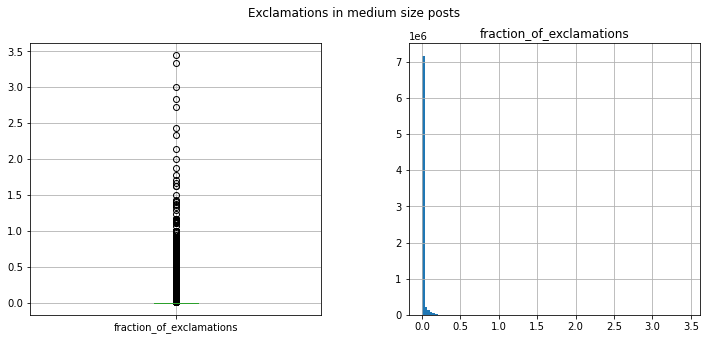

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Exclamations in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'fraction_of_exclamations'}>],
      dtype=object)

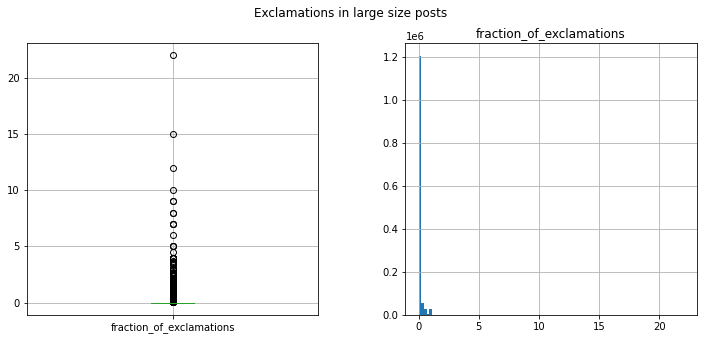

In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Exclamations in large size posts')
ta_ext[((ta_ext['message_words']<=short_message_limit_words) )][['fraction_of_exclamations']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']<=short_message_limit_words) )][['fraction_of_exclamations']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'fraction_of_questions'}>],
      dtype=object)

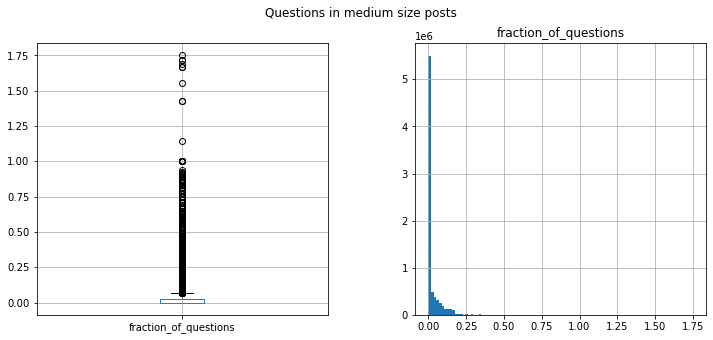

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Questions in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_questions']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_questions']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'fraction_of_questions'}>],
      dtype=object)

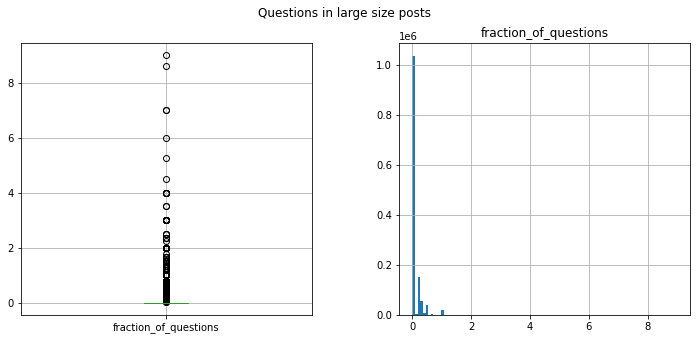

In [81]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Questions in large size posts')
ta_ext[((ta_ext['message_words']<=short_message_limit_words) )][['fraction_of_questions']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']<=short_message_limit_words) )][['fraction_of_questions']].hist(ax=axes[1], bins=100)

In [82]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations', 'fraction_of_questions','Chapter']].groupby('Chapter').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                      \
                                                median      mean       std   
Chapter                                                                      
Все остальное                                      0.0  0.009511  0.035960   
Детская психология и развитие                      0.0  0.005256  0.022643   
Телефон Доверия                                    0.0  0.006076  0.025781   

                                        fraction_of_questions            \
                                   skew                median      mean   
Chapter                                                                   
Все остальное                  7.310767                   0.0  0.023177   
Детская психология и развитие  7.850174                   0.0  0.019735   
Телефон Доверия                7.104200                   0.0  0.024627   

                                                   
                                    std      skew  
Chapter                                            
Все остальное                  0.049613  2.990627  
Детская психология и развитие  0.042673  3.264836  
Телефон Доверия                0.048394  2.829043

In [83]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations', 'fraction_of_questions','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                                \
                                    median      mean       std      skew   
sentiment_tatyana                                                          
NEGATIVE                               0.0  0.007435  0.029522  8.759041   
NEUTRAL                                0.0  0.004973  0.025056  7.447497   
POSITIVE                               0.0  0.010264  0.035898  5.914521   

                  fraction_of_questions                                
                                 median      mean       std      skew  
sentiment_tatyana                                                      
NEGATIVE                            0.0  0.024503  0.046370  2.846411  
NEUTRAL                             0.0  0.031290  0.058903  2.418116  
POSITIVE                            0.0  0.011388  0.031134  4.207224

In [84]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations', 'fraction_of_questions','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                                \
                                       median      mean       std      skew   
sentiment_dostoevsky                                                          
NEGATIVE                                  0.0  0.006982  0.026067  6.508995   
NEUTRAL                                   0.0  0.006063  0.027013  8.972204   
POSITIVE                                  0.0  0.022847  0.057269  3.772075   

                     fraction_of_questions                                
                                    median      mean       std      skew  
sentiment_dostoevsky                                                      
NEGATIVE                               0.0  0.012042  0.029904  4.520835  
NEUTRAL                                0.0  0.028839  0.053478  2.550863  
POSITIVE                               0.0  0.004669  0.019186  5.633922

More exclamations in negative and positive. Positive has less questions

In [85]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations', 'fraction_of_questions','isAnonym']].groupby('isAnonym').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                                \
                                 median      mean       std      skew   
isAnonym                                                                
Anonymous Post                      0.0  0.006601  0.027769  7.988179   
Known author                        0.0  0.008182  0.032285  7.239912   

               fraction_of_questions                                
                              median      mean       std      skew  
isAnonym                                                            
Anonymous Post                   0.0  0.025207  0.050095  2.804835  
Known author                     0.0  0.021704  0.046181  3.097892

In [86]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_exclamations', 'fraction_of_questions','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations            \
                                                       median      mean   
Binned Number of Immediate Responses                                      
(-0.001, 1.0]                                             0.0  0.007466   
(1.0, 5.0]                                                0.0  0.006449   
(5.0, 200.0]                                              0.0  0.007161   

                                                           \
                                           std       skew   
Binned Number of Immediate Responses                        
(-0.001, 1.0]                         0.030524   7.207820   
(1.0, 5.0]                            0.026114  10.615949   
(5.0, 200.0]                          0.027703  20.888429   

                                     fraction_of_questions            \
                                                    median      mean   
Binned Number of Immediate Responses                                   
(-0.001, 1.0]                                     0.000000  0.023181   
(1.0, 5.0]                                        0.000000  0.025842   
(5.0, 200.0]                                      0.019048  0.031680   

                                                          
                                           std      skew  
Binned Number of Immediate Responses                      
(-0.001, 1.0]                         0.048509  2.956468  
(1.0, 5.0]                            0.047824  2.799934  
(5.0, 200.0]                          0.042979  2.697580

In [87]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([16035,90820,116852,191294,124655])))][['fraction_of_exclamations', 'fraction_of_questions','Author_Id']].groupby('Author_Id').agg({'fraction_of_exclamations':['median','mean','std','skew'],'fraction_of_questions':['median','mean','std','skew']})

fraction_of_exclamations                                 \
                            median      mean       std       skew   
Author_Id                                                           
16035                          0.0  0.004309  0.029563  43.068947   
90820                          0.0  0.003612  0.018365   8.915136   
116852                         0.0  0.005413  0.025061   7.844884   
124655                         0.0  0.023282  0.056047   3.824422   
191294                         0.0  0.000213  0.004281  29.750694   

          fraction_of_questions                                
                         median      mean       std      skew  
Author_Id                                                      
16035                       0.0  0.026408  0.056852  3.182358  
90820                       0.0  0.023644  0.045729  2.805018  
116852                      0.0  0.031714  0.056425  2.279509  
124655                      0.0  0.042816  0.065945  2.046308  
191294                      0.0  0.026177  0.059638  4.674625

In [88]:
diff_in_authors_style('fraction_of_exclamations',2)
diff_in_authors_style('fraction_of_questions',2)

fraction_of_exclamations mean of all analyzed authors is 0.007965714880464646
fraction_of_exclamations std of all analyzed authors is 0.03188913051318328
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of fraction_of_exclamations is 0.28180354267310787
fraction_of_questions mean of all analyzed authors is 0.02206087769858074
fraction_of_questions std of all analyzed authors is 0.04654948664581652
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of fraction_of_questions is 0.0


Well, exclamations are used more distincly by some authors.

## Fraction of recognized adjective (num_Adj/num_words), nouns (num_Nouns/num_words) and verbs (num_Verbs/num_words) to all other words

In [89]:
ta_ext[['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                                \
                                         median      mean       std      skew   
Binned Number of Words per Post                                                 
(-0.001, 5.0]                          0.333333  0.435979  0.282760  1.236635   
(5.0, 100.0]                           0.076923  0.087749  0.052043  1.640029   
(100.0, 6000.0]                        0.058824  0.062282  0.028361  1.207216   

                                fraction_of_Nouns                      \
                                           median      mean       std   
Binned Number of Words per Post                                         
(-0.001, 5.0]                            0.333333  0.473612  0.281938   
(5.0, 100.0]                             0.222222  0.228877  0.093197   
(100.0, 6000.0]                          0.225989  0.229428  0.055396   

                                          fraction_of_Verbs            \
                                     skew            median      mean   
Binned Number of Words per Post                                         
(-0.001, 5.0]                    1.188260          0.333333  0.450596   
(5.0, 100.0]                     0.772606          0.162500  0.169323   
(100.0, 6000.0]                  2.042961          0.168142  0.168369   

                                                     
                                      std      skew  
Binned Number of Words per Post                      
(-0.001, 5.0]                    0.281305  1.151988  
(5.0, 100.0]                     0.071781  0.996095  
(100.0, 6000.0]                  0.038679  0.052887

array([<AxesSubplot:title={'center':'fraction_of_Adj'}>], dtype=object)

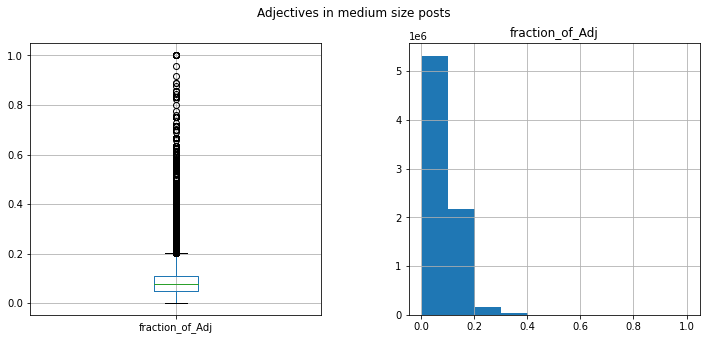

In [90]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Adjectives in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj']].hist(ax=axes[1])

array([<AxesSubplot:title={'center':'fraction_of_Nouns'}>], dtype=object)

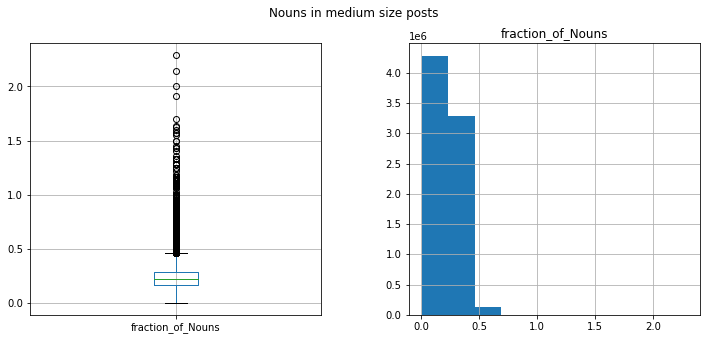

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Nouns in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Nouns']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Nouns']].hist(ax=axes[1])

array([<AxesSubplot:title={'center':'fraction_of_Verbs'}>], dtype=object)

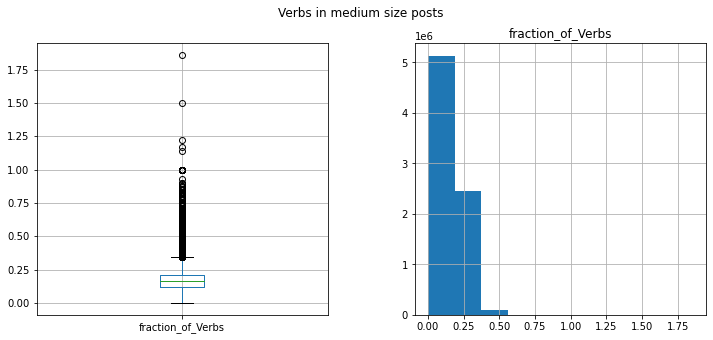

In [92]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Verbs in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Verbs']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Verbs']].hist(ax=axes[1])

In [93]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','Chapter']].groupby('Chapter').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']}) 

fraction_of_Adj                                \
                                       median      mean       std      skew   
Chapter                                                                       
Все остальное                        0.083333  0.094884  0.054769  1.645391   
Детская психология и развитие        0.069767  0.079875  0.048506  1.645864   
Телефон Доверия                      0.072464  0.083914  0.049951  1.617039   

                              fraction_of_Nouns                                \
                                         median      mean       std      skew   
Chapter                                                                         
Все остальное                          0.230769  0.238701  0.098460  0.776643   
Детская психология и развитие          0.222222  0.227406  0.086244  0.741501   
Телефон Доверия                        0.214286  0.221944  0.089712  0.734909   

                              fraction_of_Verbs                                
                                         median      mean       std      skew  
Chapter                                                                        
Все остальное                          0.156250  0.166238  0.073566  1.094468  
Детская психология и развитие          0.166667  0.173359  0.069336  0.877891  
Телефон Доверия                        0.166667  0.170870  0.070791  0.946136

In [94]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                                \
                           median      mean       std      skew   
sentiment_tatyana                                                 
NEGATIVE                 0.071429  0.080640  0.048366  1.709544   
NEUTRAL                  0.090909  0.100613  0.054863  1.499361   
POSITIVE                 0.074074  0.084796  0.052118  1.780218   

                  fraction_of_Nouns                                \
                             median      mean       std      skew   
sentiment_tatyana                                                   
NEGATIVE                   0.217391  0.223322  0.089169  0.660158   
NEUTRAL                    0.230769  0.239178  0.101428  0.836396   
POSITIVE                   0.222222  0.226229  0.088295  0.741542   

                  fraction_of_Verbs                                
                             median      mean       std      skew  
sentiment_tatyana                                                  
NEGATIVE                   0.166667  0.170000  0.070320  0.866655  
NEUTRAL                    0.160714  0.170650  0.076231  1.150720  
POSITIVE                   0.160000  0.166138  0.068328  0.959546

In [95]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                                \
                              median      mean       std      skew   
sentiment_dostoevsky                                                 
NEGATIVE                    0.066667  0.078832  0.048635  1.786320   
NEUTRAL                     0.076923  0.089035  0.051482  1.548486   
POSITIVE                    0.090909  0.104435  0.063271  1.785450   

                     fraction_of_Nouns                                \
                                median      mean       std      skew   
sentiment_dostoevsky                                                   
NEGATIVE                      0.207547  0.213443  0.084322  0.719201   
NEUTRAL                       0.225806  0.234007  0.095077  0.757433   
POSITIVE                      0.214286  0.224537  0.095002  0.831998   

                     fraction_of_Verbs                                
                                median      mean       std      skew  
sentiment_dostoevsky                                                  
NEGATIVE                      0.166667  0.171244  0.067230  0.871909  
NEUTRAL                       0.161290  0.169491  0.073145  1.020771  
POSITIVE                      0.150685  0.160652  0.070937  1.083543

In [96]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','isAnonym']].groupby('isAnonym').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                              fraction_of_Nouns  \
                        median      mean      std      skew            median   
isAnonym                                                                        
Anonymous Post        0.076923  0.087047  0.05170  1.628927          0.222222   
Known author          0.076923  0.088595  0.05244  1.652390          0.222222   

                                             fraction_of_Verbs            \
                    mean       std      skew            median      mean   
isAnonym                                                                   
Anonymous Post  0.227999  0.093175  0.769315          0.166667  0.170841   
Known author    0.229934  0.093213  0.776813          0.160000  0.167494   

                                    
                     std      skew  
isAnonym                            
Anonymous Post  0.071947  0.978422  
Known author    0.071539  1.018653

In [97]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                      \
                                              median      mean       std   
Binned Number of Immediate Responses                                       
(-0.001, 1.0]                               0.076923  0.088616  0.052244   
(1.0, 5.0]                                  0.071429  0.083214  0.050732   
(5.0, 200.0]                                0.064516  0.074757  0.047199   

                                               fraction_of_Nouns            \
                                          skew            median      mean   
Binned Number of Immediate Responses                                         
(-0.001, 1.0]                         1.627439          0.222222  0.227540   
(1.0, 5.0]                            1.722184          0.230769  0.235887   
(5.0, 200.0]                          1.819289          0.243902  0.248418   

                                                         fraction_of_Verbs  \
                                           std      skew            median   
Binned Number of Immediate Responses                                         
(-0.001, 1.0]                         0.093656  0.787561          0.162162   
(1.0, 5.0]                            0.090470  0.709532          0.162162   
(5.0, 200.0]                          0.082810  0.686790          0.172414   

                                                                    
                                          mean       std      skew  
Binned Number of Immediate Responses                                
(-0.001, 1.0]                         0.169466  0.072303  1.010473  
(1.0, 5.0]                            0.168141  0.068919  0.903993  
(5.0, 200.0]                          0.177074  0.064401  0.717090

In [98]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([69715,16035,90820,116852,191294,124655])))][['fraction_of_Adj','fraction_of_Nouns', 'fraction_of_Verbs','Author_Id']].groupby('Author_Id').agg({'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Nouns':['median','mean','std','skew'],'fraction_of_Adj':['median','mean','std','skew'],'fraction_of_Verbs':['median','mean','std','skew']})

fraction_of_Adj                               fraction_of_Nouns  \
                   median      mean       std      skew            median   
Author_Id                                                                   
16035            0.096774  0.108717  0.063880  1.692940          0.264151   
69715            0.071429  0.082496  0.050405  1.495327          0.212121   
90820            0.076923  0.085778  0.050022  1.650933          0.230769   
116852           0.090909  0.102881  0.055891  1.541989          0.222222   
124655           0.071429  0.081102  0.049977  1.513270          0.188679   
191294           0.076923  0.088611  0.049569  1.453238          0.214286   

                                        fraction_of_Verbs                      \
               mean       std      skew            median      mean       std   
Author_Id                                                                       
16035      0.268610  0.100608  0.601182          0.142857  0.150624  0.069685   
69715      0.218237  0.085833  0.838028          0.158918  0.160779  0.062125   
90820      0.234767  0.085886  0.623400          0.148936  0.155803  0.064147   
116852     0.229530  0.096884  0.777699          0.150000  0.162082  0.074015   
124655     0.203283  0.094444  1.000195          0.166667  0.172186  0.072706   
191294     0.222235  0.089879  0.667415          0.166667  0.172281  0.071996   

                     
               skew  
Author_Id            
16035      1.195775  
69715      0.710134  
90820      0.973483  
116852     1.096539  
124655     0.880512  
191294     0.932924

There is a variaty in fraction of adjective, well, with high std and skew (consistent) but not nouns or verbs

In [99]:
diff_in_authors_style('fraction_of_Adj',2)
diff_in_authors_style('fraction_of_Nouns',2)
diff_in_authors_style('fraction_of_Verbs',2)

fraction_of_Adj mean of all analyzed authors is 0.08884382110523648
fraction_of_Adj std of all analyzed authors is 0.05245662913483471
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of fraction_of_Adj is 0.0
fraction_of_Nouns mean of all analyzed authors is 0.22982520042730942
fraction_of_Nouns std of all analyzed authors is 0.09316374838567566
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of fraction_of_Nouns is 0.0
fraction_of_Verbs mean of all analyzed authors is 0.16696856325309697
fraction_of_Verbs std of all analyzed authors is 0.07147109143443581
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of fraction_of_Verbs is 0.0


Well, despite there are no outliers I will try to use fraction_of_Adj to distiguish some authors.

## Number of sentences and Average sentence length 

In [100]:
ta_ext[['num_sent', 'avg_sent_len','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                                   \
                                  median       mean        std       skew   
Binned Number of Words per Post                                             
(-0.001, 5.0]                          1   0.701010   0.708313   7.085109   
(5.0, 100.0]                           2   2.889085   2.360146   1.875831   
(100.0, 6000.0]                       12  14.183725  12.074643  24.636353   

                                avg_sent_len                                   
                                      median       mean        std       skew  
Binned Number of Words per Post                                                
(-0.001, 5.0]                       1.666667   1.860787   1.854882   0.421848  
(5.0, 100.0]                        8.375000   9.569316   6.990885   2.465343  
(100.0, 6000.0]                    11.888889  13.688560  10.040042  18.128326

Ok, the longer the post, the more sentences and they are longer.

array([<AxesSubplot:title={'center':'num_sent'}>], dtype=object)

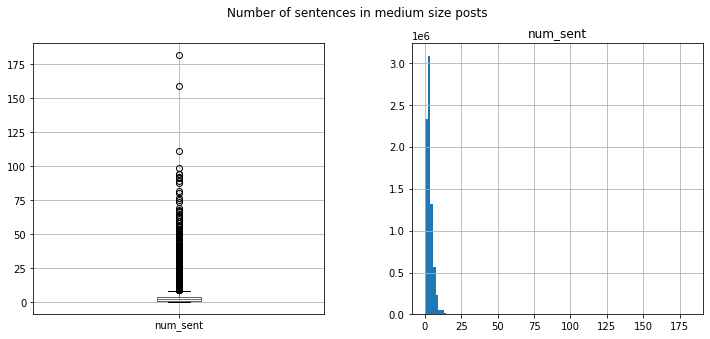

In [101]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Number of sentences in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'num_sent'}>], dtype=object)

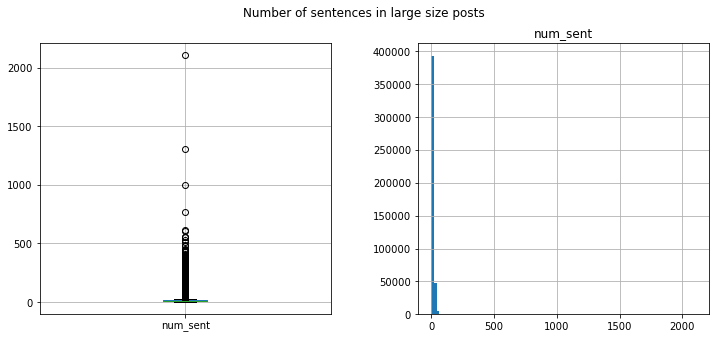

In [102]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Number of sentences in large size posts')
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['num_sent']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['num_sent']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'avg_sent_len'}>], dtype=object)

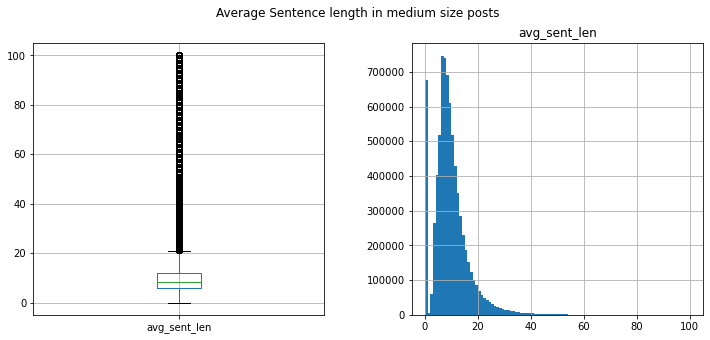

In [103]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Average Sentence length in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['avg_sent_len']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['avg_sent_len']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'avg_sent_len'}>], dtype=object)

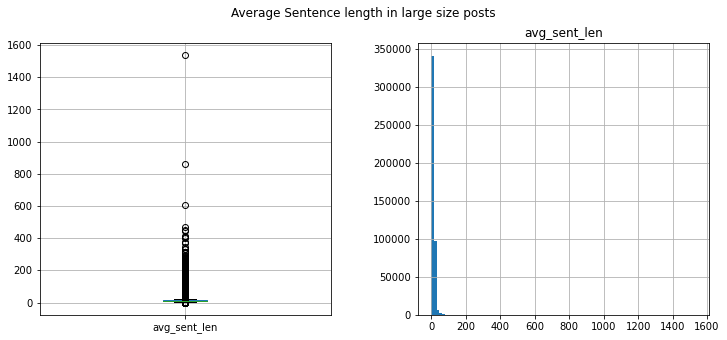

In [104]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Average Sentence length in large size posts')
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['avg_sent_len']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>medium_message_limit_words) )][['avg_sent_len']].hist(ax=axes[1], bins=100)

In [105]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent', 'avg_sent_len','Chapter']].groupby('Chapter').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                                \
                                median      mean       std      skew   
Chapter                                                                
Все остальное                        2  2.617093  2.245873  2.487960   
Детская психология и развитие        3  3.343051  2.584706  1.441530   
Телефон Доверия                      2  3.008128  2.378037  1.593283   

                              avg_sent_len                                 
                                    median       mean       std      skew  
Chapter                                                                    
Все остальное                     8.000000   9.008566  6.851210  2.283772  
Детская психология и развитие     9.333333  10.687607  7.662368  2.666894  
Телефон Доверия                   8.555556   9.782570  6.932243  2.552798

Детская психология и развитие has more longer sentenses in average

In [106]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent', 'avg_sent_len','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                               avg_sent_len  \
                    median      mean       std      skew       median   
sentiment_tatyana                                                       
NEGATIVE                 3  3.106856  2.309224  1.864335          8.5   
NEUTRAL                  2  2.445329  2.220778  2.411064          8.0   
POSITIVE                 2  3.047056  2.556191  1.470964          9.0   

                                                  
                        mean       std      skew  
sentiment_tatyana                                 
NEGATIVE            9.699936  6.552440  2.460542  
NEUTRAL             8.716365  6.456420  2.494432  
POSITIVE           10.461299  8.303642  2.283585

In [107]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent', 'avg_sent_len','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                               avg_sent_len  \
                       median      mean       std      skew       median   
sentiment_dostoevsky                                                       
NEGATIVE                    3  3.492473  2.606602  1.415443         8.80   
NEUTRAL                     2  2.742840  2.261366  2.090725         8.25   
POSITIVE                    2  2.437498  2.179855  1.633045         8.00   

                                                     
                           mean       std      skew  
sentiment_dostoevsky                                 
NEGATIVE              10.100379  7.105852  2.719470  
NEUTRAL                9.448127  6.868049  2.402866  
POSITIVE               9.085786  7.825573  2.304396

In [108]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent', 'avg_sent_len','isAnonym']].groupby('isAnonym').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                               avg_sent_len            \
                 median      mean       std      skew       median      mean   
isAnonym                                                                       
Anonymous Post        2  2.918766  2.364020  1.830031     8.333333  9.461037   
Known author          2  2.853316  2.354972  1.932484     8.500000  9.699805   

                                    
                     std      skew  
isAnonym                            
Anonymous Post  6.777388  2.514845  
Known author    7.237663  2.403903

In [109]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['num_sent', 'avg_sent_len','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                                \
                                       median      mean       std      skew   
Binned Number of Immediate Responses                                          
(-0.001, 1.0]                               2  2.792929  2.286475  1.904587   
(1.0, 5.0]                                  3  3.355395  2.608749  1.701069   
(5.0, 200.0]                                4  5.159280  3.461235  1.019657   

                                     avg_sent_len                       \
                                           median       mean       std   
Binned Number of Immediate Responses                                     
(-0.001, 1.0]                            8.333333   9.488138  6.997824   
(1.0, 5.0]                               8.800000  10.026839  6.959756   
(5.0, 200.0]                             8.800000  10.032484  6.315835   

                                                
                                          skew  
Binned Number of Immediate Responses            
(-0.001, 1.0]                         2.444192  
(1.0, 5.0]                            2.588486  
(5.0, 200.0]                          3.231834

In [110]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([69715,16035,90820,116852,191294,124655])))][['num_sent', 'avg_sent_len','Author_Id']].groupby('Author_Id').agg({'num_sent':['median','mean','std','skew'],'avg_sent_len':['median','mean','std','skew']})

num_sent                               avg_sent_len             \
            median      mean       std      skew       median       mean   
Author_Id                                                                  
16035            3  3.348519  3.101593  2.652540     6.666667   7.825338   
69715            2  2.792683  1.970006  1.233049    10.000000  11.071444   
90820            3  3.175086  2.468020  1.570408     9.750000  11.289450   
116852           2  2.653552  1.889114  1.574808     7.000000   7.727400   
124655           1  1.873829  2.087848  1.802771     7.000000  10.185770   
191294           2  2.137949  1.786891  3.206075    10.500000  11.389237   

                                
                 std      skew  
Author_Id                       
16035       6.433321  2.542263  
69715       7.698791  1.932245  
90820       7.963897  2.133475  
116852      4.726895  1.781301  
124655     12.463136  2.482584  
191294      6.151608  1.312011

Is higher mean avg_sent_len + higher positive skew with relatively the same num_sent mean the sign of skipped periods?

In [111]:
diff_in_authors_style('num_sent',2)
diff_in_authors_style('avg_sent_len',2)

num_sent mean of all analyzed authors is 2.836404968767199
num_sent std of all analyzed authors is 2.3355052648422983
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of num_sent is 0.08051529790660225
avg_sent_len mean of all analyzed authors is 9.682603588821877
avg_sent_len std of all analyzed authors is 7.19372164922091
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of avg_sent_len is 0.040257648953301126


There is always high skew in sentense number and average length. If an author skips periods, we will see less sentenses but with high std and positive skew and longer sentenses with high atd and positive skew.

## Excessive exclamations, questions and other (!!!! or ???? or !???? or ?!!!)

In [112]:
ta_ext[['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','Binned Number of Words per Post']].groupby('Binned Number of Words per Post').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']})

flg_excessive_exclamations            \
                                                    median      mean   
Binned Number of Words per Post                                        
(-0.001, 5.0]                                            0  0.020082   
(5.0, 100.0]                                             0  0.017028   
(100.0, 6000.0]                                          0  0.060682   

                                                    flg_excessive_questions  \
                                      std      skew                  median   
Binned Number of Words per Post                                               
(-0.001, 5.0]                    0.140280  6.842287                       0   
(5.0, 100.0]                     0.129374  7.466307                       0   
(100.0, 6000.0]                  0.238746  3.680230                       0   

                                                               \
                                     mean       std      skew   
Binned Number of Words per Post                                 
(-0.001, 5.0]                    0.010908  0.103869  9.417508   
(5.0, 100.0]                     0.017275  0.130293  7.409821   
(100.0, 6000.0]                  0.041987  0.200559  4.567390   

                                flg_excessive_other                      \
                                             median      mean       std   
Binned Number of Words per Post                                           
(-0.001, 5.0]                                     0  0.003567  0.059615   
(5.0, 100.0]                                      0  0.006706  0.081613   
(100.0, 6000.0]                                   0  0.019257  0.137426   

                                            
                                      skew  
Binned Number of Words per Post             
(-0.001, 5.0]                    16.654802  
(5.0, 100.0]                     12.088607  
(100.0, 6000.0]                   6.996442

array([<AxesSubplot:title={'center':'flg_excessive_exclamations'}>],
      dtype=object)

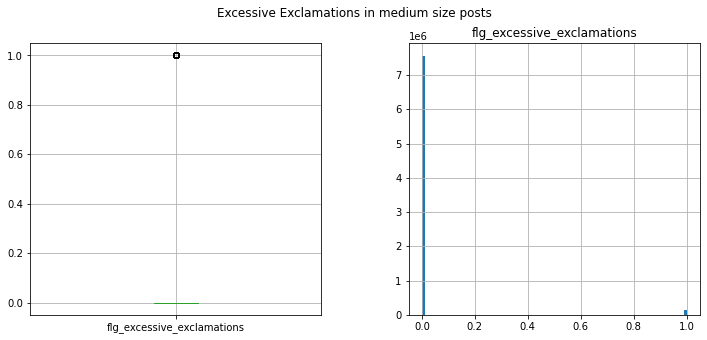

In [113]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Excessive Exclamations in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'flg_excessive_exclamations'}>],
      dtype=object)

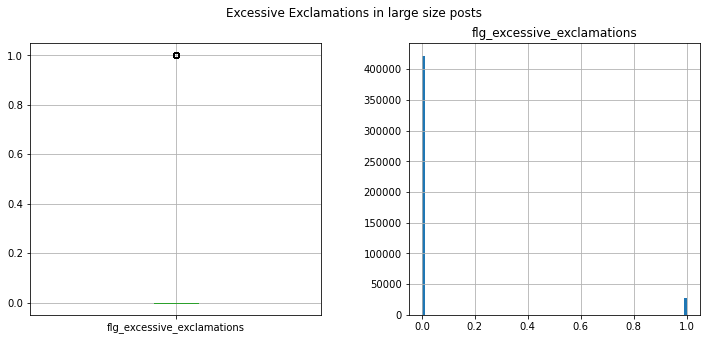

In [114]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Excessive Exclamations in large size posts')
ta_ext[((ta_ext['message_words']>medium_message_limit_words))][['flg_excessive_exclamations']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>medium_message_limit_words))][['flg_excessive_exclamations']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'flg_excessive_questions'}>],
      dtype=object)

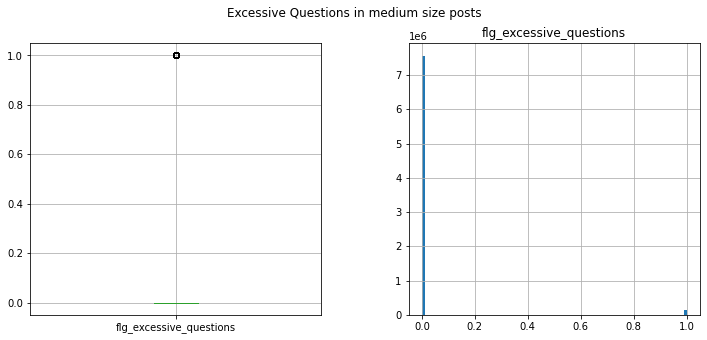

In [115]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('Excessive Questions in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_questions']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_questions']].hist(ax=axes[1], bins=100)

array([<AxesSubplot:title={'center':'flg_excessive_other'}>], dtype=object)

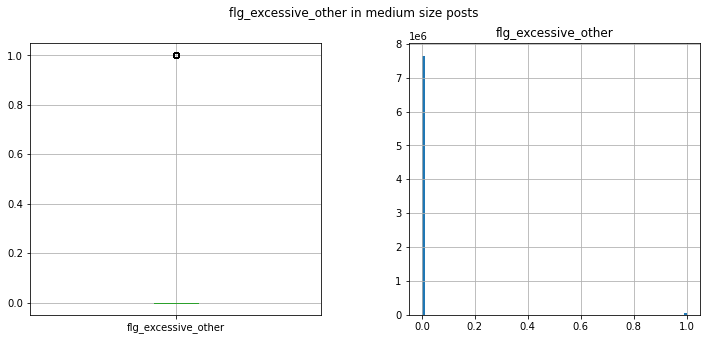

In [116]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)
fig.suptitle('flg_excessive_other in medium size posts')
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_other']].boxplot(ax=axes[0])
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_other']].hist(ax=axes[1], bins=100)

In [117]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','Chapter']].groupby('Chapter').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']})

flg_excessive_exclamations                      \
                                                  median      mean       std   
Chapter                                                                        
Все остальное                                          0  0.019155  0.137071   
Детская психология и развитие                          0  0.016029  0.125587   
Телефон Доверия                                        0  0.015646  0.124102   

                                        flg_excessive_questions            \
                                   skew                  median      mean   
Chapter                                                                     
Все остальное                  7.016015                       0  0.015537   
Детская психология и развитие  7.707396                       0  0.016730   
Телефон Доверия                7.805772                       0  0.018643   

                                                  flg_excessive_other  \
                                    std      skew              median   
Chapter                                                                 
Все остальное                  0.123676  7.834371                   0   
Детская психология и развитие  0.128257  7.536008                   0   
Телефон Доверия                0.135261  7.117479                   0   

                                                              
                                   mean       std       skew  
Chapter                                                       
Все остальное                  0.006415  0.079838  12.364650  
Детская психология и развитие  0.006504  0.080384  12.278520  
Телефон Доверия                0.006954  0.083099  11.866432

In [118]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','sentiment_tatyana']].groupby('sentiment_tatyana').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']}) 

flg_excessive_exclamations                                 \
                                      median      mean       std       skew   
sentiment_tatyana                                                             
NEGATIVE                                   0  0.020772  0.142622   6.720255   
NEUTRAL                                    0  0.006935  0.082987  11.882915   
POSITIVE                                   0  0.023088  0.150184   6.351042   

                  flg_excessive_questions                                \
                                   median      mean       std      skew   
sentiment_tatyana                                                         
NEGATIVE                                0  0.022404  0.147992  6.454354   
NEUTRAL                                 0  0.014540  0.119704  8.111035   
POSITIVE                                0  0.010511  0.101983  9.599408   

                  flg_excessive_other                                 
                               median      mean       std       skew  
sentiment_tatyana                                                     
NEGATIVE                            0  0.008812  0.093456  10.511676  
NEUTRAL                             0  0.004629  0.067881  14.595343  
POSITIVE                            0  0.005224  0.072089  13.726913

In [119]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','sentiment_dostoevsky']].groupby('sentiment_dostoevsky').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']}) 

flg_excessive_exclamations                                \
                                         median      mean       std      skew   
sentiment_dostoevsky                                                            
NEGATIVE                                      0  0.022651  0.148787  6.416540   
NEUTRAL                                       0  0.012892  0.112810  8.635916   
POSITIVE                                      0  0.044520  0.206247  4.416866   

                     flg_excessive_questions                                 \
                                      median      mean       std       skew   
sentiment_dostoevsky                                                          
NEGATIVE                                   0  0.018180  0.133601   7.212827   
NEUTRAL                                    0  0.018002  0.132957   7.250451   
POSITIVE                                   0  0.005779  0.075799  13.040279   

                     flg_excessive_other                                 
                                  median      mean       std       skew  
sentiment_dostoevsky                                                     
NEGATIVE                               0  0.009343  0.096209  10.199871  
NEUTRAL                                0  0.006169  0.078300  12.613839  
POSITIVE                               0  0.003559  0.059548  16.673613

Overall, Neutral has less exclamation.

In [120]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','isAnonym']].groupby('isAnonym').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']})  

flg_excessive_exclamations                               \
                                   median     mean       std      skew   
isAnonym                                                                 
Anonymous Post                          0  0.01598  0.125398  7.719713   
Known author                            0  0.01829  0.133997  7.189854   

               flg_excessive_questions                                \
                                median      mean       std      skew   
isAnonym                                                               
Anonymous Post                       0  0.017749  0.132036  7.304834   
Known author                         0  0.016704  0.128159  7.542129   

               flg_excessive_other                                 
                            median      mean       std       skew  
isAnonym                                                           
Anonymous Post                   0  0.007089  0.083899  11.750103  
Known author                     0  0.006243  0.078768  12.537028

In [121]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','Binned Number of Immediate Responses']].groupby('Binned Number of Immediate Responses').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']})  

flg_excessive_exclamations            \
                                                         median      mean   
Binned Number of Immediate Responses                                        
(-0.001, 1.0]                                                 0  0.016296   
(1.0, 5.0]                                                    0  0.020420   
(5.0, 200.0]                                                  0  0.037835   

                                                          \
                                           std      skew   
Binned Number of Immediate Responses                       
(-0.001, 1.0]                         0.126612  7.640760   
(1.0, 5.0]                            0.141431  6.781858   
(5.0, 200.0]                          0.190799  4.844724   

                                     flg_excessive_questions            \
                                                      median      mean   
Binned Number of Immediate Responses                                     
(-0.001, 1.0]                                              0  0.015938   
(1.0, 5.0]                                                 0  0.024245   
(5.0, 200.0]                                               0  0.037712   

                                                         flg_excessive_other  \
                                           std      skew              median   
Binned Number of Immediate Responses                                           
(-0.001, 1.0]                         0.125236  7.730371                   0   
(1.0, 5.0]                            0.153809  6.186302                   0   
(5.0, 200.0]                          0.190500  4.853608                   0   

                                                                     
                                          mean       std       skew  
Binned Number of Immediate Responses                                 
(-0.001, 1.0]                         0.006325  0.079277  12.454452  
(1.0, 5.0]                            0.008692  0.092826  10.585550  
(5.0, 200.0]                          0.012516  0.111173   8.770164

The posts with the most responses have more excessive exclamations and questions

In [122]:
ta_ext[((ta_ext['message_words']>short_message_limit_words) & (ta_ext['message_words']<=medium_message_limit_words) & (ta_ext['Author_Id'].isin([69715,16035,90820,116852,191294,124655])))][['flg_excessive_exclamations', 'flg_excessive_questions','flg_excessive_other','Author_Id']].groupby('Author_Id').agg({'flg_excessive_exclamations':['median','mean','std','skew'],'flg_excessive_questions':['median','mean','std','skew'],'flg_excessive_other':['median','mean','std','skew']})  

flg_excessive_exclamations                                 \
                              median      mean       std       skew   
Author_Id                                                             
16035                              0  0.007285  0.085040  11.588175   
69715                              0  0.014071  0.117840   8.262749   
90820                              0  0.009700  0.098011  10.005284   
116852                             0  0.004374  0.065993  15.021303   
124655                             0  0.256191  0.436547   1.117173   
191294                             0  0.002961  0.054337  18.295439   

          flg_excessive_questions                                 \
                           median      mean       std       skew   
Author_Id                                                          
16035                           0  0.031532  0.174752   5.361679   
69715                           0  0.041276  0.199021   4.618478   
90820                           0  0.005940  0.076842  12.859517   
116852                          0  0.027115  0.162419   5.823307   
124655                          0  0.141064  0.348102   2.062588   
191294                          0  0.000853  0.029198  34.191942   

          flg_excessive_other                                 
                       median      mean       std       skew  
Author_Id                                                     
16035                       0  0.003211  0.056573  17.563316  
69715                       0  0.002814  0.053000  18.797080  
90820                       0  0.018402  0.134401   7.166804  
116852                      0  0.013654  0.116051   8.381997  
124655                      0  0.031041  0.173435   5.408790  
191294                      0  0.009787  0.098446   9.959504

Well, some authors definetly use excessive exclamations or question marks.

In [123]:
diff_in_authors_style('flg_excessive_exclamations',2)
diff_in_authors_style('flg_excessive_questions',2)
diff_in_authors_style('flg_excessive_other',2)

flg_excessive_exclamations mean of all analyzed authors is 0.017161920704958897
flg_excessive_exclamations std of all analyzed authors is 0.12987451321103283
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of flg_excessive_exclamations is 0.20128824476650564
flg_excessive_questions mean of all analyzed authors is 0.016656475248299316
flg_excessive_questions std of all analyzed authors is 0.12798061212365885
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of flg_excessive_questions is 0.040257648953301126
flg_excessive_other mean of all analyzed authors is 0.006122796354069738
flg_excessive_other std of all analyzed authors is 0.07800838236421463
Threahold for z-score to find outliers is 2
Percent of authors with significant different average of flg_excessive_other is 0.040257648953301126
